## Testing new unified fitting strategy

In [29]:
import knot_fit_utils

knots = knot_fit_utils.get_knots_from_region_file(
    'Will-Regions-2016-11/will-knots-blue-fast-SLITS/XX1620-2010-01-236-nii-vhel.reg')

from astropy.io import fits
hdu, = fits.open('Calibrated/BGsub/XX1620-2010-01-236-nii-vhel.fits')

kn = knot_fit_utils.fit_knot_unified(hdu, *knots['4266-415 (-60)'])

print(kn['knot fit info'])

Slit pixels 359:393 out of 512
wrap_Knot.amplitude lower bound:	-0.00732216
wrap_Knot.amplitude upper bound:	0.00735825
wrap_Knot.mean lower bound:	-4.72226
wrap_Knot.mean upper bound:	-----
wrap_Knot.stddev lower bound:	-----
wrap_Knot.stddev upper bound:	5.49777
datasets       = None
itermethodname = none
methodname     = levmar
statname       = chi2
succeeded      = True
parnames       = ('wrap_Knot.amplitude', 'wrap_Knot.mean', 'wrap_Knot.stddev')
parvals        = (0.013339157346623257, -50.81808184592289, 5.3563936809473685)
statval        = 74.70289010519465
istatval       = 104.16605849341542
dstatval       = 29.4631683882
numpoints      = 101
dof            = 98
qval           = 0.961575316606
rstat          = 0.7622743888285168
message        = successful termination
nfev           = 29


In [26]:
kn['knot fit model']

<Gaussian1D(amplitude=0.11774771886638552, mean=-14.45367596982137, stddev=12.666085284506885, name='Knot')>

In [21]:
[kn['core fit model'][name] for name in kn['core fit model'].submodel_names]

[<Lorentz1D(amplitude=0.02350860403120454, x_0=17.8399008255848, fwhm=100.0, name='Lorentz')>,
 <Const1D(amplitude=0.005095827596217944, name='Constant')>,
 <Gaussian1D(amplitude=0.6051449603013224, mean=5.901603384654114, stddev=5.0001375772710395, name='G0')>,
 <Gaussian1D(amplitude=5.178162093555774, mean=15.599216533811585, stddev=5.700078032910443, name='G1')>,
 <Gaussian1D(amplitude=2.5148674277060574, mean=22.51782906106077, stddev=5.084693487773511, name='G2')>,
 <Gaussian1D(amplitude=0.16438939660837615, mean=19.835349781205327, stddev=7.280806585259577, name='G3')>,
 <Gaussian1D(amplitude=0.07605510456785683, mean=44.52718044533582, stddev=11.249372649230594, name='G4')>,
 <Gaussian1D(amplitude=0.32810389068479257, mean=-67.69079334682259, stddev=7.609436539870994, name='Fast other')>,
 <Gaussian1D(amplitude=0.006062623507195321, mean=-95.15483791999858, stddev=16.607032682940847, name='Ultra-fast other')>,
 <Gaussian1D(amplitude=0.43231658271051315, mean=33.39095945462565, s

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(context='notebook', 
        style='whitegrid', 
        palette='dark',
        font_scale=1.5,
        color_codes=True)


[None, (0.001, 100.0), (-150, 150)]

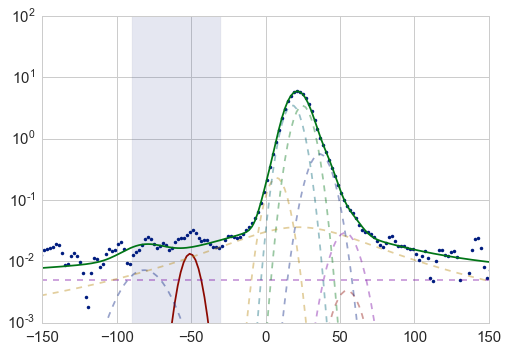

In [30]:
fig, ax = plt.subplots(1, 1)
ax.plot('velocities', 'full profile', '.', data=kn)
ax.plot('velocities', 'core fit profile', data=kn)
ax.plot('velocities', 'knot fit profile', data=kn)
for k, v in kn['core fit components'].items():
    ax.plot(kn['velocities'], v, '--', alpha=0.4)
ax.legend(pos='upper left')
ax.fill_betweenx([0.0, 100.0], 
                 [kn['nominal knot velocity'] - 30.0]*2,
                 [kn['nominal knot velocity'] + 30.0]*2, 
                 alpha=0.1)
ax.set(xlim=[-150, 150], yscale='log', ylim=[0.001, None])

[(-150, 150)]

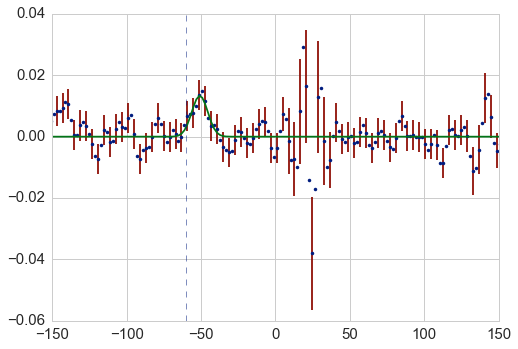

In [31]:
fig, ax = plt.subplots(1, 1)
ax.plot(kn['velocities'], kn['core-subtracted profile'], '.')
ax.plot(kn['velocities'], kn['knot fit model'](kn['velocities']))
ax.errorbar(kn['velocities'], kn['core-subtracted profile'], 
            kn['error profile'], fmt=None, errorevery=2)
ax.axvline(kn['nominal knot velocity'], lw=0.5, ls='--')
ax.set(xlim=[-150, 150])

In [7]:
print(kn['knot fit errors'])

(['amplitude', 'mean', 'stddev'], (0.59147817771980493, -66.600001203294468, 13.761713725046747), (-0.0081368390701258564, -0.22086322362491728, -0.22416631165053147), (0.0081614795851852051, 0.22047184217741744, 0.22966346723250197))


In [32]:
import os
knot_fit_utils.KNOT_DIR = 'Knot-Fits-Unified'
save_dir = 'Knot-Fits-Unified/4266-415'
line_id = 'nii'
slit_id = 'XX1620-2010-01-236'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
knot_fit_utils.save_fit_data(kn, save_dir, line_id, slit_id)
knot_fit_utils.plot_core_fit(kn, save_dir, line_id, slit_id)
knot_fit_utils.plot_knot_fit(kn, save_dir, line_id, slit_id)

## Testing `process_slit`

In [2]:
import knot_fit_utils

In [3]:
knot_fit_utils.process_slit('XX1585-2010-01-214-ha-vhel.fits')

-*^*- -*^*- -*^*- -*^*- -*^*- -*^*- -*^*- -*^*- -*^*- -*^*- 
Processing XX1585-2010-01-214-ha-vhel.fits
Processing knot 4264-707 (-50) in slit XX1585-2010-01-214-ha-vhel.fits
Slit pixels 93:121 out of 512
Rescaling data errors by 0.994605515027
wrap_.amplitude lower bound:	-0.00493788
wrap_.amplitude upper bound:	0.00499034
wrap_.mean lower bound:	-0.58428
wrap_.mean upper bound:	0.578729
wrap_.stddev lower bound:	-0.595395
wrap_.stddev upper bound:	0.63224
Processing knot 4266-415 (-60) in slit XX1585-2010-01-214-ha-vhel.fits
Slit pixels 365:410 out of 512
Rescaling data errors by 0.876673938888
wrap_.amplitude lower bound:	-0.00677772
wrap_.amplitude upper bound:	0.00701814
wrap_.mean lower bound:	-1.43683
wrap_.mean upper bound:	1.47043
wrap_.stddev lower bound:	-1.36766
wrap_.stddev upper bound:	1.53888
Processing knot 4268-656 (-50) in slit XX1585-2010-01-214-ha-vhel.fits
Slit pixels 102:153 out of 512
wrap_.amplitude lower bound:	-0.00540529
wrap_.amplitude upper bound:	0.0054329

In [2]:
knot_fit_utils.process_slit('XX1540-2010-01-124-ha-vhel.fits')

Processing knot 4281-535 (-60) in slit XX1540-2010-01-124-ha-vhel.fits
Rescaling data errors by 0.78490547101
wrap_.amplitude lower bound:	-0.0113302
wrap_.amplitude upper bound:	0.0118691
wrap_.mean lower bound:	-1.94477
wrap_.mean upper bound:	2.04142
wrap_.stddev lower bound:	-1.89195
wrap_.stddev upper bound:	2.26491
Processing knot 4285-444 (-60) in slit XX1540-2010-01-124-ha-vhel.fits
Rescaling data errors by 0.543578549303
wrap_.amplitude lower bound:	-0.0106105
wrap_.amplitude upper bound:	0.0109465
wrap_.mean lower bound:	-1.54999
wrap_.mean upper bound:	1.53609
wrap_.stddev lower bound:	-1.43433
wrap_.stddev upper bound:	1.59678


In [3]:
knot_fit_utils.process_slit('XX1540-2010-01-124-nii-vhel.fits')

Processing knot 4281-535 (-60) in slit XX1540-2010-01-124-nii-vhel.fits
Rescaling data errors by 0.808133284028
wrap_.amplitude lower bound:	-0.0115941
wrap_.amplitude upper bound:	0.0136379
wrap_.mean lower bound:	-4.4059
wrap_.mean upper bound:	4.10854
wrap_.stddev lower bound:	-3.5415
wrap_.stddev upper bound:	5.16847
Processing knot 4285-444 (-60) in slit XX1540-2010-01-124-nii-vhel.fits
Rescaling data errors by 0.824952011497
wrap_.amplitude lower bound:	-0.0113721
wrap_.amplitude upper bound:	0.0134131
wrap_.mean lower bound:	-4.66165
wrap_.mean upper bound:	5.65127
wrap_.stddev lower bound:	-4.25684
wrap_.stddev upper bound:	6.58633


In [2]:
knot_fit_utils.process_slit('XX1585-2010-01-214-nii-vhel.fits')

Processing knot 4264-707 (-50) in slit XX1585-2010-01-214-nii-vhel.fits
wrap_.amplitude lower bound:	-0.00520789
wrap_.amplitude upper bound:	0.00538385
wrap_.mean lower bound:	-1.05021
wrap_.mean upper bound:	1.02076
wrap_.stddev lower bound:	-1.09369
wrap_.stddev upper bound:	1.20641
Processing knot 4258-744 (-60) in slit XX1585-2010-01-214-nii-vhel.fits
wrap_.amplitude lower bound:	-0.0064025
wrap_.amplitude upper bound:	0.0068346
wrap_.mean lower bound:	-2.23855
wrap_.mean upper bound:	2.1562
wrap_.stddev lower bound:	-2.48818
wrap_.stddev upper bound:	3.23042
Processing knot 4271-440 (-60) in slit XX1585-2010-01-214-nii-vhel.fits
wrap_.amplitude lower bound:	-0.00679765
wrap_.amplitude upper bound:	0.00694841
wrap_.mean lower bound:	-0.989315
wrap_.mean upper bound:	1.09522
wrap_.stddev lower bound:	-1.10227
wrap_.stddev upper bound:	1.43568
Processing knot 4263-554 (-60) in slit XX1585-2010-01-214-nii-vhel.fits
wrap_.amplitude lower bound:	-0.00555263
wrap_.amplitude upper bound:

In [3]:
knot_fit_utils.process_slit('XX1585-2010-01-214-ha-vhel.fits')

Processing knot 4268-656 (-50) in slit XX1585-2010-01-214-ha-vhel.fits
wrap_.amplitude lower bound:	-0.00540529
wrap_.amplitude upper bound:	0.00543294
wrap_.mean lower bound:	-0.288316
wrap_.mean upper bound:	0.286353
wrap_.stddev lower bound:	-0.281505
wrap_.stddev upper bound:	0.290124
Processing knot 4258-744 (-60) in slit XX1585-2010-01-214-ha-vhel.fits
Rescaling data errors by 0.983801152626
wrap_.amplitude lower bound:	-0.00955442
wrap_.amplitude upper bound:	0.00975524
wrap_.mean lower bound:	-0.956864
wrap_.mean upper bound:	0.946046
wrap_.stddev lower bound:	-0.902775
wrap_.stddev upper bound:	0.978234
Processing knot 4271-440 (-60) in slit XX1585-2010-01-214-ha-vhel.fits
wrap_.amplitude lower bound:	-0.00812071
wrap_.amplitude upper bound:	0.00833708
wrap_.mean lower bound:	-1.07208
wrap_.mean upper bound:	1.10984
wrap_.stddev lower bound:	-0.995655
wrap_.stddev upper bound:	1.07515
Processing knot 4268-637 (-60) in slit XX1585-2010-01-214-ha-vhel.fits
wrap_.amplitude lower 

# From JSON files to a pandas dataframe

In [1]:
import knot_table_utils
import pandas as pd
import numpy as np

knot_table_utils.JSON_FILE_GLOB = 'Knot-Fits-Final/*/*.json'
d = knot_table_utils.get_dataframe()
d.head()


Vnom               Vc                    Wc  \
line                           ha   nii         ha        nii         ha   
knot     slit                                                              
051-420  XX0430-2007-01-054 -40.0 -40.0  13.200697  18.939808  32.870120   
         XX0443-2007-01-067 -40.0 -40.0  14.195589  17.981246  33.043746   
         XX0447-2007-01-072 -40.0 -40.0  13.466497  17.992880  31.567486   
103-325  YY1314-2013-12-086 -35.0 -35.0  13.970296  19.754471  34.057994   
4230-523 YY1058-2013-02-149 -40.0 -40.0  20.370853  19.738636  27.714320   

                                                 Fc                      F  \
line                               nii           ha         nii         ha   
knot     slit                                                                
051-420  XX0430-2007-01-054  29.312177  1390.137603  162.561573   1.566167   
         XX0443-2007-01-067  29.441205  1315.503071  150.530808   9.984819   
         XX0447-2007-01-072  29.694511  1099.476453  122.304528  15.973177   
103-325  YY1314-2013-12-086  27.697621  2012.696897  367.654157   0.000000   
4230-523 YY1058-2013-02-149  19.243070   373.672033  117.015527   2.422237   

                                         ...             W             \
line                              nii    ...            ha        nii   
knot     slit                            ...                            
051-420  XX0430-2007-01-054  0.120685    ...           NaN  11.774100   
         XX0443-2007-01-067  0.134296    ...     27.076953  11.774100   
         XX0447-2007-01-072  0.167213    ...           NaN  37.526867   
103-325  YY1314-2013-12-086  2.200620    ...           NaN  21.883207   
4230-523 YY1058-2013-02-149  0.892094    ...     58.103349  58.870501   

                                   dW-                  dW+            \
line                                ha        nii        ha       nii   
knot     slit                                                           
051-420  XX0430-2007-01-054        NaN        NaN       NaN       NaN   
         XX0443-2007-01-067  -1.899395        NaN  1.266562       NaN   
         XX0447-2007-01-072        NaN        NaN       NaN       NaN   
103-325  YY1314-2013-12-086        NaN        NaN       NaN  17.42809   
4230-523 YY1058-2013-02-149 -10.820947 -10.340274       NaN       NaN   

                                  chi2                chi2c            
line                                ha       nii         ha       nii  
knot     slit                                                          
051-420  XX0430-2007-01-054        NaN  1.065353        NaN  0.451510  
         XX0443-2007-01-067  27.389367  1.477693  11.128037  0.650805  
         XX0447-2007-01-072        NaN  1.153937        NaN  0.483526  
103-325  YY1314-2013-12-086        NaN  1.056464        NaN  0.918890  
4230-523 YY1058-2013-02-149   1.251794  1.000828   0.806229  0.466989  

[5 rows x 34 columns]

Although a single index selects a column, an index range or a mask expression will select rows.  For instance, here I select all the rows with Ha velocities more blue than $-80$ and [N II] fit quality higher than 3:

In [2]:
d[(d.V.ha < -80.0) & (d.Q.nii > 2.0) ][['Q', 'V']]

Q                      V            
line                                  ha        nii          ha         nii
knot     slit                                                              
4246-556 XX1646-2010-01-244     3.910211   3.372095 -100.579649  -95.846684
         YY1000-2013-02-232     7.528208  12.441612  -99.006229  -94.704164
4251-609 XX1633-2010-01-240     8.192544   6.867895  -82.372029  -79.337107
4255-617 XX1620-2010-01-236     4.256726   2.898742  -95.584127 -100.000000
4380-417 XX1251-2007-01b-2057   4.486758   2.335845  -81.371132  -87.021972
4381-552 YY1000-2013-02-232     1.130584   3.871379  -99.204992  -92.590120
         YY1019-2013-02-226     2.837833   2.463991 -101.620706  -96.155106
4382-328 XX1232-2007-01b-2053   1.830661   4.048338  -84.486656  -82.675518
4397-544 XX1180-2006-02-286     3.459928   2.163725  -90.000000  -80.916934
         XX1182-2006-02-291     8.384121   3.385553  -85.273357  -87.458287
         XX1189-2006-02-296     6.373204   2.508418  -87.325660  -88.014940
         XX1189-2007-01b-2041  12.644747   3.268465  -86.333069  -90.000000
         XX1204-2007-01b-2045   5.843293   2.975923  -87.830028  -90.000000
         XX1218-2007-01b-2049   7.849677   4.636367  -87.245348  -90.000000
         XX1251-2007-01b-2057   3.743469   2.949214  -88.612023  -90.000000
         YY1000-2013-02-232     2.970952   3.627779  -88.178106  -86.812009
         YY1019-2013-02-226     8.857075   4.583018  -90.000000  -86.448451
4402-526 YY1058-2013-02-149     0.943718   2.398705  -88.705380  -94.132279
         YY1068-2013-02-154     1.958647   2.007600  -91.334005  -94.098205
4407-259 XX1166-2006-02-270     1.915280   4.045403 -125.000000 -125.000000

We can combine row selection with column selection by using the `.loc` indexer.  Here we mask the rows and use fancy indexing to subset the columns:

In [3]:
sdata = d.loc[d.Q.nii > 100.0, ['Q', 'V', 'W']]
sdata

Q                      V             \
line                                    ha         nii         ha        nii   
knot     slit                                                                  
4248-552 YY1000-2013-02-232     418.935048  203.022421 -13.182134 -14.872300   
4252-557 YY1000-2013-02-232     150.564753  179.208730 -69.648483 -69.746106   
4253-615 YY0955-2013-02-169    1034.199826  177.071693  -6.427195 -16.047544   
4255-551 YY1000-2013-02-232     125.010531  119.067938 -68.140114 -68.358750   
4259-615 YY0971-2013-02-237     134.780787  113.674415 -59.674345 -55.619253   
4263-625 YY0936-2013-02-165     199.440556  113.601746 -56.355939 -58.517735   
4267-548 YY1019-2013-02-226     130.203030  106.710096 -64.933339 -64.874012   
4269-610 YY0971-2013-02-237     220.067953  103.173629  -5.909961  -4.258049   
4273-547 YY1019-2013-02-226     141.071723  117.743369 -63.708639 -63.266186   
4281-258 XX1557-2010-01-133       0.000000  131.150508        NaN -22.881771   
4284-307 XX1557-2010-01-133       0.000000  123.961147        NaN -26.737814   
4285-316 XX1549-2010-01-206     133.986539  110.735454 -30.000000 -31.402815   
4337-210 XX1389-2010-01-078       0.000000  273.753124        NaN -19.531078   
4344-512 YY1085-2013-02-159     156.535372  145.142298  -7.639167  -3.747638   
         YY1112-2013-02-033     163.249688  125.825078  -8.804112  -2.894467   
         YY1120-2013-02-029     217.659882  177.550698  -3.708886  -2.540708   
4390-142 XX1204-2007-01b-2045   195.781490  117.578579  -9.413226  -6.125200   

                                       W             
line                                  ha        nii  
knot     slit                                        
4248-552 YY1000-2013-02-232    28.890771  17.704259  
4252-557 YY1000-2013-02-232    25.901349  14.424526  
4253-615 YY0955-2013-02-169    43.880386  26.002501  
4255-551 YY1000-2013-02-232    26.969418  19.517334  
4259-615 YY0971-2013-02-237    32.864438  19.785110  
4263-625 YY0936-2013-02-165    32.387117  31.819565  
4267-548 YY1019-2013-02-226    27.211370  16.676513  
4269-610 YY0971-2013-02-237    26.617380  20.638594  
4273-547 YY1019-2013-02-226    28.742101  19.604418  
4281-258 XX1557-2010-01-133          NaN  31.947503  
4284-307 XX1557-2010-01-133          NaN  26.693964  
4285-316 XX1549-2010-01-206    37.325189  29.356553  
4337-210 XX1389-2010-01-078          NaN  16.169073  
4344-512 YY1085-2013-02-159    20.748637  15.786518  
         YY1112-2013-02-033    26.656141  22.513258  
         YY1120-2013-02-029    28.776715  19.036630  
4390-142 XX1204-2007-01b-2045  19.790247  15.293646

We can now estimate the thermal width by subtracting in quadrature the ha and nii width columns.  This gives a `Series` but we can convert it to a `DataFrame`.

In [5]:
pd.DataFrame(np.sqrt(d.W.ha**2 - d.W.nii**2), columns=['W_therm']).dropna().head()

,,W_therm
knot,slit,
051-420,XX0443-2007-01-067,24.383026
4231-512,YY1085-2013-02-159,44.586091
4242-635,XX1656-2010-01-252,10.146860
4243-457,YY1112-2013-02-033,20.909430
4243-749,XX1633-2010-01-240,17.504213


Taking means over different dimensions.  Here we average over slits in each knot, and then over the two lines for each quantity, looking at the last 10 knots:

In [6]:
d.mean(level='knot').mean(level=0, axis=1).tail(10)

,Vnom,Vc,Wc,Fc,F,Q,A,dA-,dA+,V,dV-,dV+,W,dW-,dW+,chi2,chi2c
knot,,,,,,,,,,,,,,,,,
4399-305,-5.000000,22.416305,26.531857,240.005666,9.497688,26.792408,0.687518,-0.022641,0.020487,3.084929,-0.531740,0.526659,16.880535,-1.170137,0.614744,7.136485,0.662781
4399-332,-65.000000,20.228749,29.724110,331.942079,0.416535,2.730061,0.020613,-0.007539,0.008630,-68.785746,-8.408947,6.126925,18.229864,-5.042776,18.773455,1.309374,2.391142
4402-526,-95.000000,15.287805,30.381245,256.111926,0.184320,1.827168,0.008196,-0.004591,0.005534,-92.067467,-7.132299,5.932051,21.728206,-9.857691,22.691353,0.896181,0.799676
4406-246,-65.000000,19.795918,28.818544,518.855233,0.335231,3.015461,0.017947,-0.009407,0.013358,-68.023030,-3.173780,3.106478,17.369913,-4.220385,8.198079,1.474155,2.071064
4406-345,-70.000000,18.670037,29.598564,383.307939,0.567715,3.646677,0.026391,-0.008492,0.009474,-73.929365,-3.283948,4.042561,19.792640,-6.764490,10.069937,1.772346,3.734030
4406-514,-70.000000,15.489253,30.406184,262.607790,0.145515,1.678866,0.006706,-0.006198,0.008114,-75.925312,-4.796760,5.829273,16.144872,-9.051947,14.782918,3.744320,2.992760
4407-259,-115.000000,21.683031,27.678812,160.035198,0.317295,2.192599,0.008202,-0.003611,0.004929,-121.113144,NaN,8.581074,37.901844,-18.706152,26.876780,0.744153,0.388992
4417-354,-25.000000,18.784159,30.210824,232.674983,1.163129,8.387190,0.068248,-0.006910,0.007393,-19.663802,-0.614057,0.643471,16.986981,-2.827756,3.578321,4.062684,1.081828
4457-321,-65.000000,15.798893,37.029336,795.469077,3.687376,2.887176,0.196583,-0.067834,0.083008,-70.456692,-2.451810,5.754570,15.422778,-4.795928,23.908190,1.207637,1.646256


This looks at the fit quality distribution for knots that fall in more at least 6 slits. 

In [7]:
stats = d.Q.groupby(level=0).describe().unstack()
stats[stats.ha['count'] >= 6]

/Users/will/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


line        ha                                                           \
         count        mean         std        min        25%        50%   
knot                                                                      
4248-552   6.0  126.687175  148.860324  44.456519  45.176183  51.239457   
4255-551   8.0   75.534016   46.483361  18.158364  37.130904  76.295907   
4274-625   7.0   29.613832   23.432621   3.090593  19.670726  23.262953   
4275-442   6.0   12.298593    6.705481   3.511358   6.757224  14.437650   
4392-231   6.0    3.623754    1.547445   1.469108   3.024022   3.236200   
4397-544  14.0    5.676851    3.052399   2.476870   3.276897   4.793381   
4406-345   9.0    5.528244    4.548812   0.000000        NaN        NaN   

line                               nii                                   \
                 75%         max count       mean        std        min   
knot                                                                      
4248-552  126.132971  418.935048   6.0  70.795746  68.784702  18.407754   
4255-551  100.553536  149.070634   8.0  54.030267  38.011462   9.455457   
4274-625   32.026678   77.548468   7.0  12.760231  17.144541   1.327155   
4275-442   16.977142   19.384177   6.0   4.764805   3.286442   1.551365   
4392-231    4.679963    5.686504   2.0   1.315068   0.054329   1.276651   
4397-544    7.768773   12.644747  14.0   2.655906   1.167009   1.231914   
4406-345         NaN   12.001519   8.0   1.765110   0.715098   0.868913   

line                                                   
                25%        50%        75%         max  
knot                                                   
4248-552  30.957950  45.144470  76.405808  203.022421  
4255-551  20.865967  56.456207  72.507141  119.067938  
4274-625   3.772612   4.002423  13.702298   49.042223  
4275-442   2.163931   4.372046   6.075122   10.222665  
4392-231        NaN        NaN        NaN    1.353484  
4397-544   1.560823   2.728816   3.356281    4.636367  
4406-345        NaN        NaN        NaN    2.932433

## Choosing the best slits for each knot

We want at least 1 slit for each knot, but we want to eliminate those that are much worse than the others.  

We currently are keeping all slits with Q > 10, plus the best one for each knot.

In [8]:
PREFERRED_MIN_Q = 5.0
PREFERRED_MIN_Q_FRACTION = 0.2
def choose_goodQ(x):
    bestQnii = x.Q.nii.max()
    preferred_Q_threshold = max(PREFERRED_MIN_Q, bestQnii*PREFERRED_MIN_Q_FRACTION)
    m = (x.Q.nii >= preferred_Q_threshold) & (x.Q.ha >= preferred_Q_threshold) 
    # Always choose at least one slit for each knot, even if none meet threshold
    if m.sum() == 0:
        m = x.Q.nii == bestQnii
    return x[m]

# Create a masked version of the data frame
dm = d.groupby(level='knot').apply(choose_goodQ)
# Remove repeated 'knot' index level
dm.index = dm.index.droplevel(0)

Use this masked version from now on, but save the original one. 

In [9]:
d0 = d.copy()
d = dm

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(context='notebook', 
        style='whitegrid', 
        palette='dark',
        font_scale=1.5,
        color_codes=True)

## Plot V(Ha) versus V([N II]) for all the knots

We devide the knots into 5 *quality classes* based on Q-thresholds of [1, 3, 10, 30, 100].  These are plotted with different opacities, in order to de-emphasize the low-quality fits, which tend to have much larger errors. 

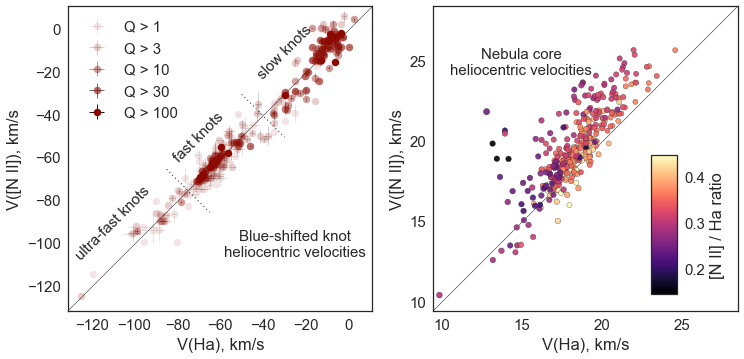

In [204]:
fig, (ax, axx) = plt.subplots(1, 2)

vmin, vmax = -131, 11
ax.plot([vmin, vmax], [vmin, vmax], color='k', lw=0.5, zorder=0)
thresholds = 1.0, 3.0, 10.0, 30.0, 100.0
next_threshes = thresholds[1:] + (1e20,)
#alphas = 0.02, 0.03, 0.1, 0.4, 0.4
alphas = 0.1, 0.2, 0.4, 0.6, 1.0
for threshold, next_thresh, alpha in zip(thresholds, next_threshes, alphas):
    dd = d0[(d0['Q']['nii'] >= threshold) & (d0['Q']['nii'] < next_thresh)]
    dx = dd[['dV-', 'dV+']].xs('ha', level='line', axis=1).T.values
    dy = dd[['dV-', 'dV+']].xs('nii', level='line', axis=1).T.values
    ax.errorbar(dd['V']['ha'], dd['V']['nii'] + 1.0, 
                xerr=np.abs(dx), yerr=np.abs(dy), 
                fmt='.', color='r', alpha=alpha, ms=15.0,
                elinewidth=1.0, ecolor='k', barsabove=True,
                label='Q > {}'.format(int(threshold)),
               )
    

bscale = 10.0
xb = np.array([-bscale, bscale])
yb = xb[::-1]
for vbound in -40.0, -75.0:
    ax.plot(xb+vbound, yb+vbound, ':', lw=1, color='k')
for vclass, label in [-100.0, 'ultra-fast'], [-60.0, 'fast'], [-20.0, 'slow']:
    ax.text(vclass - 10, vclass + 10, '{} knots'.format(label), 
            rotation=45, fontsize='small', ha='center', va='center')
ax.text(-25, -100, 'Blue-shifted knot\nheliocentric velocities', 
        fontsize='small', ha='center', va='center')
ax.legend(loc='upper left')
ax.set(aspect='equal', xlim=[vmin, vmax], ylim=[vmin, vmax],
       xlabel='V(Ha), km/s', ylabel='V([N II]), km/s',
      )

vmin, vmax = 9.5, 28.5
axx.plot([vmin, vmax], [vmin, vmax], color='k', lw=0.5, zorder=0)
scat = axx.scatter(d0['Vc']['ha'], d0['Vc']['nii'] + 1.0, 
            c=1.13*d0.Fc.nii/d0.Fc.ha, vmin=0.15, vmax=0.45, cmap='magma',
            s=6.0*np.sqrt(d0.Wc.nii), marker='o', alpha=0.9)
axx.text(15.0, 25.0, 'Nebula core\nheliocentric velocities', 
        fontsize='small', ha='center', va='center')


axx.set(aspect='equal', xlim=[vmin, vmax], ylim=[vmin, vmax],
       xlabel='V(Ha), km/s', ylabel='V([N II]), km/s',
       )

axinset = fig.add_axes([0.8, 0.2, 0.03, 0.32])
cb = fig.colorbar(scat, cax=axinset, drawedges=False, format='%.1f')
cb.set_label('[N II] / Ha ratio')
cb.set_ticks([0.2, 0.3, 0.4])

fig.set_size_inches(12, 6)
fig.savefig('knot-and-core-velocities-ha-nii.pdf')

#### Histogram of velocities

Clear tri-modal distribution of velocities. So classify into three groups: ultra-fast, fast and slow.

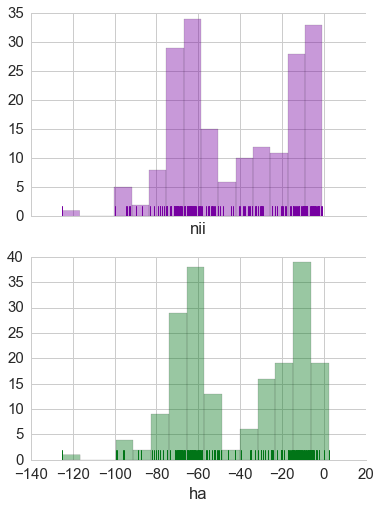

In [12]:
fig, axes = plt.subplots(2, 1, sharex=True)
sns.despine(fig, left=True)
sns.distplot(d.V.nii[d.V.nii < 0.0].dropna(), bins=15, kde=False, rug=True, ax=axes[0], color='m')
sns.distplot(d.V.ha.dropna(), bins=15, kde=False, rug=True, ax=axes[1], color='g')
fig.set_size_inches(6, 8)

#### Histogram of knot fluxes

The slow knots tend to be slightly brighter than the fast ones, and ultrafast knots are significantly fainter. 

In [14]:
from matplotlib.ticker import (MultipleLocator, LogLocator, 
                               MaxNLocator, FormatStrFormatter)

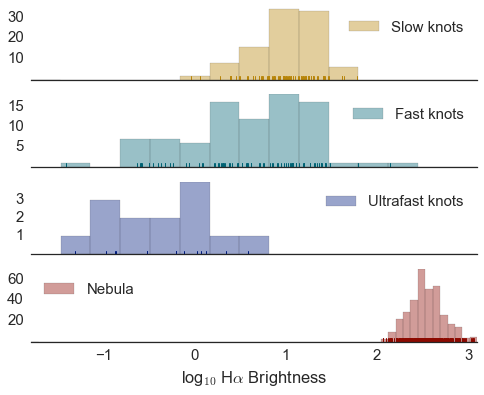

In [206]:
slow = d.V.ha > -40.0
ultrafast = d.V.ha < -75.0
fast = ~(slow | ultrafast)

sns.set(style='white', context='notebook', font_scale=1.5)
fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)
sns.despine(fig, left=True)

logF = np.log10(d.F.ha)
logF = logF[np.isfinite(logF)]

logFc = np.log10(d0.Fc.ha)
logFc = logFc[np.isfinite(logFc)]

range_ = [logF.min(), logFc.max()]
#print(range_)
range_ = [-1.8, 3.1]
hist_kws = {'range': range_}
nbins = 15
sns.distplot(logF[slow], hist_kws=hist_kws, 
             axlabel='', label='Slow knots',
             bins=nbins, kde=False, rug=True, ax=axes[0], color='y')

sns.distplot(logF[fast], hist_kws=hist_kws,
             axlabel='', label='Fast knots',
             bins=nbins, kde=False, rug=True, ax=axes[1], color='c')

sns.distplot(logF[ultrafast], hist_kws=hist_kws,
             axlabel='', label='Ultrafast knots',
             bins=nbins, kde=False, rug=True, ax=axes[2], color='b')

sns.distplot(logFc, hist_kws=hist_kws, 
             axlabel=r'log$_{10}$ H$\alpha$ Brightness', label='Nebula',
             bins=4*nbins, kde=False, rug=True, ax=axes[3], color='r')


for ax in axes:
    ax.legend(loc='best')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_major_locator(MaxNLocator(4, integer=True, prune='both'))
    ax.set(
        xlim=range_,
    )

fig.savefig('knot-histogram-bright.pdf')

The brightness distribution for the nebula is also shown.  

#### Histogram of line ratios

There is a clear tendency for the line ratios to increase in the sequence slow–fast–ultrafast.  Also, the knots have a much broader distribution of ratios than do the nebula. 

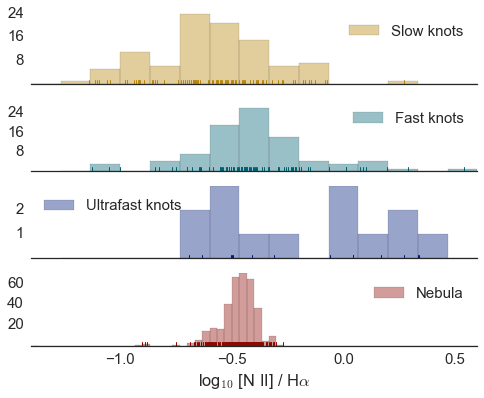

In [207]:
slow = d.V.ha > -40.0
ultrafast = d.V.ha < -75.0
fast = ~(slow | ultrafast)

sns.set(style='white', context='notebook', font_scale=1.5)
fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)
sns.despine(fig, left=True)

X = np.log10(1.13*d.F.nii/d.F.ha)
X = X[np.isfinite(X)]
Xc = np.log10(1.13*d0.Fc.nii/d0.Fc.ha)
Xc = Xc[np.isfinite(Xc)]

range_ = [X.min(), X.max()]
#print(range_)
range_ = [-1.4, 0.6]
nbins = 15
hist_kws = {'range': range_}
sns.distplot(X[slow], hist_kws=hist_kws, 
             axlabel='', label='Slow knots',
             bins=nbins, kde=False, rug=True, ax=axes[0], color='y')
sns.distplot(X[fast], hist_kws=hist_kws,
             axlabel='', label='Fast knots',
             bins=nbins, kde=False, rug=True, ax=axes[1], color='c')
sns.distplot(X[ultrafast], hist_kws=hist_kws,
             axlabel='', label='Ultrafast knots',
             bins=nbins, kde=False, rug=True, ax=axes[2], color='b')
sns.distplot(Xc, hist_kws=hist_kws,
             axlabel=r'log$_{10}$ [N II] / H$\alpha$', label='Nebula',
             bins=4*nbins, kde=False, rug=True, ax=axes[3], color='r')
for ax in axes:
    ax.legend(loc='best')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_major_locator(MaxNLocator(4, integer=True, prune='both'))
    ax.set(
        xlim=range_, 
    )
fig.savefig('knot-histogram-ratio.pdf')

### Histogram of line-widths

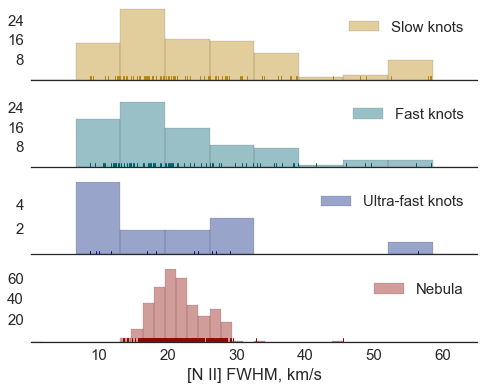

In [17]:
slow = d.V.ha > -40.0
ultrafast = d.V.ha < -75.0
fast = ~(slow | ultrafast)

sns.set(style='white', context='notebook', font_scale=1.5)
fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)
sns.despine(fig, left=True)

W_ins = 8.0 # Instrumental width
X = np.sqrt(d.W.nii**2 - W_ins**2)
X = X[np.isfinite(X)]
Xc = np.sqrt(d0.Wc.nii**2 - W_ins**2)
Xc = Xc[np.isfinite(Xc)]

range_ = [X.min(), X.max()]
#print(range_)
range_ = [0.1, 65]
nbins = 10
hist_kws = {'range': range_}
sns.distplot(X[slow], hist_kws=hist_kws, 
             axlabel='', label='Slow knots',
             bins=nbins, kde=False, rug=True, ax=axes[0], color='y')
sns.distplot(X[fast], hist_kws=hist_kws,
             axlabel='', label='Fast knots',
             bins=nbins, kde=False, rug=True, ax=axes[1], color='c')
sns.distplot(X[ultrafast], hist_kws=hist_kws,
             axlabel='', label='Ultra-fast knots',
             bins=nbins, kde=False, rug=True, ax=axes[2], color='b')
sns.distplot(Xc, hist_kws=hist_kws,
             axlabel='[N II] FWHM, km/s', label='Nebula',
             bins=4*nbins, kde=False, rug=True, ax=axes[3], color='r')
for ax in axes:
    ax.legend(loc='best')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_major_locator(MaxNLocator(4, integer=True, prune='both'))
    ax.set(
        xlim=range_, 
    )
fig.savefig('knot-histogram-fwhm.pdf')

The ultrafast knots are the narrowest, consistent with purely thermal broadening. 

The nebula widths are too large: *but I am going to change the way that the core moments are calculated*

#### Histogram of line velocities

For good measure, we will re-do the velocity histogram in the same format.

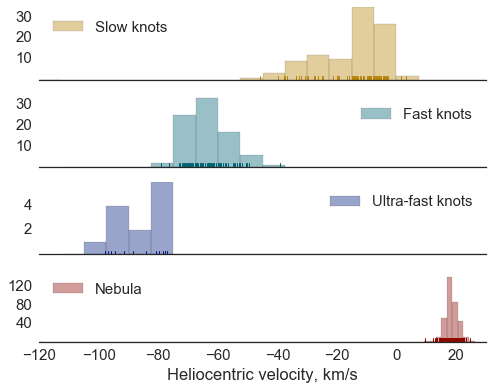

In [18]:
slow = d.V.ha > -40.0
ultrafast = d.V.ha < -75.0
fast = ~(slow | ultrafast)

sns.set(style='white', context='notebook', font_scale=1.5)
fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)
sns.despine(fig, left=True)

X = 0.5*(d.V.nii + d.V.ha)
X = X[np.isfinite(X)]
Xc = 0.5*(d0.Vc.nii + d0.Vc.ha)
Xc = Xc[np.isfinite(Xc)]

range_ = [X.min(), Xc.max()]
#print(range_)
range_ = [-120, 30]
nbins = 20
hist_kws = {'range': range_}
sns.distplot(X[slow], hist_kws=hist_kws, 
             axlabel='', label='Slow knots',
             bins=nbins, kde=False, rug=True, ax=axes[0], color='y')
sns.distplot(X[fast], hist_kws=hist_kws,
             axlabel='', label='Fast knots',
             bins=nbins, kde=False, rug=True, ax=axes[1], color='c')
sns.distplot(X[ultrafast], hist_kws=hist_kws,
             axlabel='', label='Ultra-fast knots',
             bins=nbins, kde=False, rug=True, ax=axes[2], color='b')
sns.distplot(Xc, hist_kws=hist_kws,
             axlabel='Heliocentric velocity, km/s', label='Nebula',
             bins=4*nbins, kde=False, rug=True, ax=axes[3], color='r')
for ax in axes:
    ax.legend(loc='best')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_major_locator(MaxNLocator(4, integer=True, prune='both'))
    ax.set(
        xlim=range_, 
    )
fig.savefig('knot-histogram-vel.pdf')

### Velocity differences

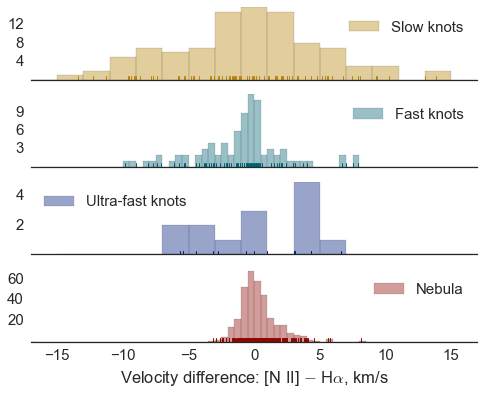

In [19]:
slow = d.V.ha > -40.0
ultrafast = d.V.ha < -75.0
fast = ~(slow | ultrafast)

sns.set(style='white', context='notebook', font_scale=1.5)
fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)
sns.despine(fig, left=True)

X = d.V.nii - d.V.ha
X = X[np.isfinite(X)]
Xc = d0.Vc.nii - d0.Vc.ha
Xc = Xc[np.isfinite(Xc)]

range_ = [X.min(), X.max()]
#print(range_)
range_ = [-17, 17]
nbins = 17
hist_kws = {'range': range_}
sns.distplot(X[slow], hist_kws=hist_kws, 
             axlabel='', label='Slow knots',
             bins=nbins, kde=False, rug=True, ax=axes[0], color='y')
sns.distplot(X[fast], hist_kws=hist_kws,
             axlabel='', label='Fast knots',
             bins=4*nbins, kde=False, rug=True, ax=axes[1], color='c')
sns.distplot(X[ultrafast], hist_kws=hist_kws,
             axlabel='', label='Ultra-fast knots',
             bins=nbins, kde=False, rug=True, ax=axes[2], color='b')
sns.distplot(Xc, hist_kws=hist_kws,
             axlabel=r'Velocity difference: [N II] $-$ H$\alpha$, km/s', 
             label='Nebula',
             bins=4*nbins, kde=False, rug=True, ax=axes[3], color='r')
for ax in axes:
    ax.legend(loc='best')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_major_locator(MaxNLocator(4, integer=True, prune='both'))
    ax.set(
        xlim=range_, 
    )
fig.savefig('knot-histogram-dv.pdf')

#### Correlation $\Delta V$ versus [N II]/Ha

There is definitely something here.  The velocity difference is more positive for lower values of the line ratio.  It looks like the trend with ratio accounts for about half the variance in the observed $\delta V$.  I plot $\delta V$ on the $y$-axis and the [N II]/Ha ratio on the $x$-axis, since there should be almost no observational errors in the line ratio.  This fits in well with the linear regression that seaborn does, since that assumes errors in $y$ only I think. 

The $\Delta V > 0$ portion of this makes perfect sense, since for higher [N II]/Ha ratio the Ha and [N II] zones should be more co-extensive, so the velocity difference should tend $\to 0$ as the ratio increases.  

But it is hard to understand why this continues for $\delta V < 0$.  In fact, it is somewhat hard to understand why we have so much $\delta V < 0$ at all.




/Users/will/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


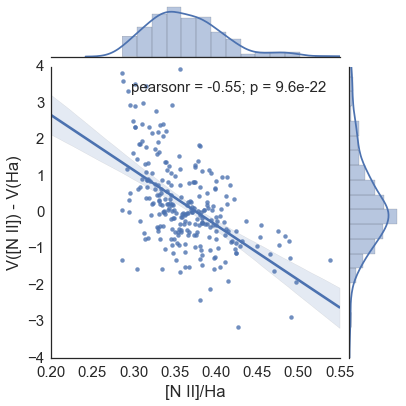

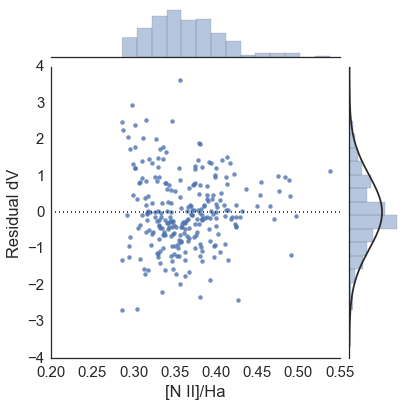

In [20]:
Xc = 1.13*d0.Fc.nii/d0.Fc.ha
Yc = d0.Vc.nii - d0.Vc.ha
mV = (d0.Vc.ha >= 16.0) & (d0.Vc.ha <= 21.0) 
m = (Xc < 0.6)  & mV & (Xc > 0.28)
xlim, ylim = [0.2, 0.55], [-4.0, 4.0]
(sns.jointplot(Xc[m], Yc[m], kind='reg', 
               xlim=xlim, ylim=ylim
              )
 .set_axis_labels('[N II]/Ha', 'V([N II]) - V(Ha)'))
(sns.jointplot(Xc[m], Yc[m], kind='resid', 
               xlim=xlim, ylim=ylim
              )
 .set_axis_labels('[N II]/Ha', 'Residual dV')) 

Compare with the same correlation in the MUSE data. 

Huygens data: N = 2568932
EON data: N = 351
Knot data: N = 68


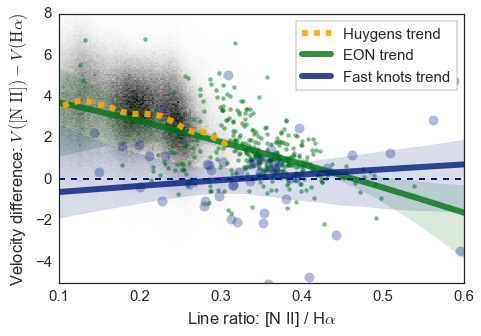

In [179]:
from astropy.io import fits

rhdu, = fits.open('../Ratios-for-Alba/ratio-6583-6563.fits')
dhdu, = fits.open('../Ratios-for-Alba/delta-V-6583-6563.fits')
hhdu, = fits.open('../Ratios-for-Alba/linesum-H_I-6563.fits')
vhdu, = fits.open('../Ratios-for-Alba/mean-H_I-6563.fits')

m = hhdu.data > 0.0*np.nanmedian(hhdu.data)
m = m & (rhdu.data > 0.0) & np.isfinite(rhdu.data)
m = m & np.isfinite(dhdu.data)
m = m & (vhdu.data > 10.0)
xdata = rhdu.data[m]
ydata = dhdu.data[m]

print('Huygens data: N =', len(xdata))

xmin, xmax = 0.1, 0.6
ymin, ymax = -5.0, 8.0


dx = 0.01
xgrid = np.arange(xmin, xmax, dx) + 0.5*dx

def make_ygrid(xdata, ydata, xlim=[0.1, 0.32]):
    ygrid, dygrid = [], []
    for x in xgrid:
        mm = np.abs(xdata -x) <= 0.5*dx
        if xlim[0] <= x <= xlim[1]:
            ygrid.append(ydata[mm].mean())
            dygrid.append(ydata[mm].std())
        else:
            ygrid.append(np.nan)
            dygrid.append(np.nan)
    return ygrid, dygrid

ygrid, dygrid = make_ygrid(xdata, ydata)
Yc_shift = +1.0
yygrid, dyygrid = make_ygrid(Xc, Yc + Yc_shift, [0.27, 0.5])

H, xedges, yedges = np.histogram2d(xdata, ydata, 
                                   bins=[200, 200],
                                   range=[[xmin, xmax], [ymin, ymax]],
                                   weights=None#hhdu.data[m]
                                  )

sns.set(style='white', context='notebook', palette='deep', font_scale=1.5)
fig, ax = plt.subplots(figsize=(7, 5))
gamma = 0.5
ax.imshow((H.T)**(1.0/gamma), 
          extent=[xmin, xmax, ymin, ymax], 
          interpolation='none', aspect='auto', 
          origin='lower', cmap=plt.cm.gray_r)

#sns.regplot(xdata, ydata, ax=ax, scatter=False,
#           line_kws=dict(lw=6, color='y', alpha=0.9, label='Huygens trend')
#           )
ax.plot(xgrid, ygrid, '--', lw=6, c='orange', alpha=0.9, zorder=10, label='Huygens trend')

sns.regplot(Xc, Yc + Yc_shift, ax=ax, order=2,
           scatter_kws=dict(alpha=0.5, color='g', label='EON nebula'),
           line_kws=dict(color='g', lw=6, alpha=0.8, label='EON trend')
          )
print('EON data: N =', len(Xc))

#ax.scatter(Xc, Yc + Yc_shift, alpha=0.3, c='r', label='EON nebula')
#ax.plot(xgrid, yygrid, c='r', lw=10, alpha=0.9, label='EON trend')


X = 1.13*d.F.nii/d.F.ha
Y = d.V.nii - d.V.ha
mW = (d.W.nii < 30.0) & (fast )
#ax.scatter(X[mW], Y[mW], s=100, alpha=0.3, c='c', label='Fast knots')
sns.regplot(X[mW], Y[mW] + Yc_shift, ax=ax, robust=False, order=2,
            scatter_kws=dict(s=100, alpha=0.3, color='b', label='Fast knots'),
            line_kws=dict(color='b', lw=6, alpha=0.8, label='Fast knots trend')
           )
print('Knot data: N =', len(X[mW]))


#dx = 0.05
#xgrid = np.arange(xmin, xmax, dx) + 0.5*dx
#ykgrid, dykgrid = make_ygrid(X[mW], Y[mW], [0.15, 0.65])
#ax.plot(xgrid, ykgrid, c='c', lw=6, alpha=0.8, label='Fast knots trend')

ax.axhline(0.0, lw=2, ls='--')
legend = ax.legend(loc='upper right', fontsize='small', frameon=True)

ax.set(
    xlim=[xmin, xmax], 
    ylim=[ymin, ymax],
    xlabel=r'Line ratio: [N II] / H$\alpha$',
    ylabel=r'Velocity difference: $V\,(\mathrm{[N\ II]}) - V\,(\mathrm{H\alpha})$',
);
fig.tight_layout()
fig.savefig('knot-dv-versus-nii-ha-ratio.pdf')



So, adding about 1 km/s to the velocities makes for consistency at both ends for the EON nebula measurements: we would match with the MUSE Huygens values around [N II]/Ha = 0.3 and we would tend to zero velocity difference at high line ratios. 

**But** if we do that, then the fast knots would be no longer centered on zero velocity difference, which they are very well if we do not make any shifts at all. 

**Update 2016-12-14:** With the new data we get a much more consistent picture.  A shift of +1 km/s in Mezcal [N II] – Ha velocity fixes three things simultaneously: 

1. It means that EON nebula and Huygens nebula trend lines match up in the dV versus line ratio plot
2. It means that $\delta V \to 0$ for high [N II]/Ha ratio.  This is expected when the Ha and [N II] emission zones overlap completely.  (The temperature gradients are too small to have much effect, and the densities in the EON are too low for collisional deexcitation of [N II] to be an issue). 
3. The fast knots become centered on zero velocity difference (and no dependence on line ratio). This is to be expected if the knots are either (a) of homogenous velocity, or (b) of homogeneous ionization (or both). 

In [8]:
dx = 0.03
xx = np.arange(xmin, xmax, dx)
xx

array([ 0.  ,  0.03,  0.06,  0.09,  0.12,  0.15,  0.18,  0.21,  0.24,
        0.27,  0.3 ,  0.33,  0.36,  0.39,  0.42,  0.45,  0.48])

#### High quality knots with disparate velocities

First we do ones where V([N II]) is the largest (less blue).  We have 3 criteria that must be matched:

1. Velocity difference is bigger than 3-$\sigma$
2. Velocity difference is bigger than 2 km/s
3. Fit quality $Q$ is bigger than 10

One of the knots in this group, 4257-614, is also has anomalously high [N II] width, as discussed below.  Probably due to two components with different [N II]/Ha ratios.



In [50]:
dV_thresh = 2.0
mv = fast & (d['V', 'nii'] + d['dV-', 'nii'] > d['V', 'ha']) & (d['Q', 'nii'] > 10.0) & (d['V', 'nii'] - dV_thresh > d['V', 'ha'])
d[mv][['Q', 'chi2', 'A', 'V', 'W']]

Q                  chi2             \
line                                 ha         nii        ha        nii   
knot     slit                                                              
4258-626 XX1609-2010-01-219   70.745483   71.833744  3.260334   1.021541   
4259-615 XX1601-2010-01-248   42.197956   29.617300  6.005247   1.209873   
         YY0971-2013-02-237  134.780787  113.674415  5.308699  11.087955   

                                    A                    V             \
line                               ha       nii         ha        nii   
knot     slit                                                           
4258-626 XX1609-2010-01-219  0.576583  0.352434 -62.221322 -59.263776   
4259-615 XX1601-2010-01-248  0.809621  0.376095 -63.875150 -61.759893   
         YY0971-2013-02-237  0.877516  0.398177 -59.674345 -55.619253   

                                     W             
line                                ha        nii  
knot     slit                                      
4258-626 XX1609-2010-01-219  29.751023  27.350369  
4259-615 XX1601-2010-01-248  27.979131  32.322176  
         YY0971-2013-02-237  32.864438  19.785110

Next, we look at cases where [N II] is bluer than Ha.  There are relatively few of these.  

In the case of 4262-629, it is because of contamination by an intermediate velocity (-25 km/s) component that is under-subtracted in Ha, making V(Ha) more red than it should be.  Interestingly, a different slit of 4262-629 features in the previous group.  There, the problem is *over*-subtraction of the intermediate velocity component in Ha.


In the other case, 4275-626, the difference in velocities is only just bigger than the 2 km/s threshold. 

*Neither of these two feature in the list any longer.*

In [51]:
dV_thresh = 2.0
mv = fast & (d['V', 'nii'] + d['dV+', 'nii'] < d['V', 'ha']) & (d['Q', 'nii'] > 10.0) & (d['V', 'nii'] + dV_thresh < d['V', 'ha'])
d[mv][['Q', 'chi2', 'A', 'V', 'W']]

Q                  chi2            \
line                                 ha         nii        ha       nii   
knot     slit                                                             
4255-551 XX1633-2010-01-240   70.956430   61.347045  1.095660  1.207623   
4263-625 YY0936-2013-02-165  199.440556  113.601746  2.030700  3.354427   
4266-614 YY0955-2013-02-169  255.052982   87.556786  3.003959  2.139017   
         YY0971-2013-02-237   99.240766   84.349792  2.762552  3.953877   
4273-610 YY0971-2013-02-237   58.231050   27.296239  1.146760  1.619965   
4274-625 YY0955-2013-02-169   77.548468   49.042223  3.446655  1.388887   

                                    A                    V             \
line                               ha       nii         ha        nii   
knot     slit                                                           
4255-551 XX1633-2010-01-240  0.518991  0.436516 -66.486111 -70.210540   
4263-625 YY0936-2013-02-165  0.713575  0.355039 -56.355939 -58.517735   
4266-614 YY0955-2013-02-169  0.871466  0.265519 -50.968570 -53.881079   
         YY0971-2013-02-237  0.646678  0.319534 -51.899783 -54.939439   
4273-610 YY0971-2013-02-237  0.165493  0.057847 -63.214713 -65.502999   
4274-625 YY0955-2013-02-169  0.211248  0.154179 -45.943251 -54.977329   

                                     W             
line                                ha        nii  
knot     slit                                      
4255-551 XX1633-2010-01-240  23.000871  14.713699  
4263-625 YY0936-2013-02-165  32.387117  31.819565  
4266-614 YY0955-2013-02-169  23.482490  21.291380  
         YY0971-2013-02-237  23.115833  13.246681  
4273-610 YY0971-2013-02-237  32.332902  22.862934  
4274-625 YY0955-2013-02-169  53.233205  26.040119

Looking at all the slits for 4262-629.  Both of the vertical slits are problematic, but the horizontal slit is much better (higher Q).  It still has a high $\chi^2$ due to presence of multiple components, but the V are more consistent.


In [32]:
d.loc['4259-618'][['Q', 'chi2', 'A', 'V', 'dV-', 'dV+', 'W']]

Q                 chi2                   A  \
line                       ha        nii        ha       nii        ha   
slit                                                                     
XX1601-2010-01-248  38.963639  11.731312  1.183578  0.981832  0.205743   
XX1609-2010-01-219  41.063736  51.560434  1.112094  1.150772  0.204380   

                                      V                  dV-            \
line                     nii         ha        nii        ha       nii   
slit                                                                     
XX1601-2010-01-248  0.080120 -47.488951 -46.108552 -0.478471 -0.942795   
XX1609-2010-01-219  0.200022 -52.781478 -57.923312 -0.325222 -0.301322   

                         dV+                    W             
line                      ha       nii         ha        nii  
slit                                                          
XX1601-2010-01-248  0.481648  0.942441  37.654782  22.616156  
XX1609-2010-01-219  0.324951  0.299257  26.852785  30.712130

This is a case, 4268-656, where the velocity difference is just a bit more than 2 km/s. 

In [18]:
d.loc['4268-656'][['Q', 'chi2', 'A', 'V', 'dV-', 'dV+', 'W']]

Q                 chi2                   A  \
line                       ha        nii        ha       nii        ha   
slit                                                                     
XX1585-2010-01-214  53.296343  18.128112  4.350083  1.071291  0.288819   

                                      V                  dV-            \
line                     nii         ha        nii        ha       nii   
slit                                                                     
XX1585-2010-01-214  0.140961 -53.979174 -51.722559 -0.288316 -0.800793   

                         dV+                    W             
line                      ha       nii         ha        nii  
slit                                                          
XX1585-2010-01-214  0.286353  0.799815  30.422247  30.377388

## Plot Ha versus [N II] line widths

TypeError: object of type 'float' has no len()

In [93]:
def predicted_Ha_width(T4, Wnii, Wins=8.0):
    fwhm_over_sigma = 2*np.sqrt(2*np.log(2.0))
    sig2_fs = 10.233
    Te_factor = 82.5*(1.0 - 1.0/14.0)
    Wha_squared = Wnii**2
    Wha_squared += Te_factor*T4*fwhm_over_sigma**2
    Wha_squared += sig2_fs*fwhm_over_sigma**2
    minW2 = Wins**2 + (82.5/14)*T4*fwhm_over_sigma**2
    try:
        Wha_squared[Wnii**2 < minW2] = np.nan
    except TypeError:
        if Wnii**2 < minW2:
            Wha_squared = np.nan
    return np.sqrt(Wha_squared)

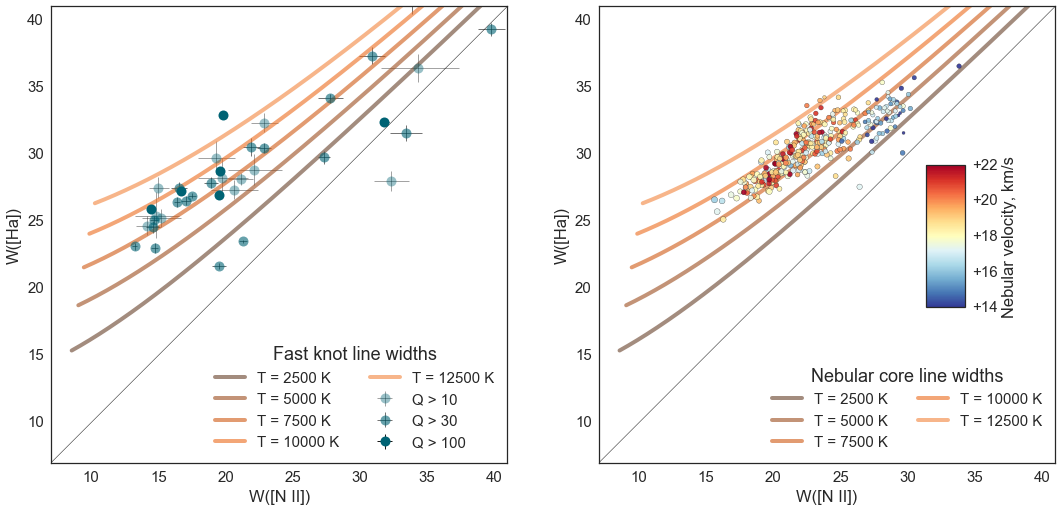

In [174]:
sns.set_palette("Oranges_d")
fig, (ax, axx) = plt.subplots(1, 2)
wmin, wmax = 7, 41
ax.plot([wmin, wmax], [wmin, wmax], color='k', lw=0.5, zorder=0)

w0 = np.linspace(0.0, wmax, 500)
for T4 in [0.25, 0.5, 0.75, 1.0, 1.25]:
#for T4 in [0.0, 0.5, 1.0, 1.5, 2.0]:
    ax.plot(w0, predicted_Ha_width(T4, w0),
            label='T = {:.0f} K'.format(1e4*T4),
            lw=4,
            alpha=0.6)
thresholds = 10.0, 30.0, 100.0
next_threshes = thresholds[1:] + (1e20,)
alphas = 0.4, 0.6, 1.0

slow = d.V.ha > -40.0
ultrafast = d.V.ha < -75.0
fast = ~(slow | ultrafast)

for threshold, next_thresh, alpha in zip(thresholds, next_threshes, alphas):

    for color, mask, label in (
        ['c', fast, 'Q > {}'.format(int(threshold))], 
        ['m', ultrafast, None], 
        ['r', slow, None]
    )[:-2]:

        dd = d[mask & (d['Q']['nii'] >= threshold) & (d['Q']['nii'] < next_thresh)]
        dx = dd[['dW-', 'dW+']].xs('nii', level='line', axis=1).T.values
        dy = dd[['dW-', 'dW+']].xs('ha', level='line', axis=1).T.values
        ax.errorbar(dd['W']['nii'], dd['W']['ha'], 
                xerr=np.abs(dx), yerr=np.abs(dy), 
                fmt='.', color=color, alpha=alpha, ms=20.0,
                elinewidth=1.0, ecolor='k', barsabove=True,
                label=label,
               )
        
ax.legend(loc='lower right', ncol=2, title='Fast knot line widths')
ax.set(aspect='equal', xlim=[wmin, wmax], ylim=[wmin, wmax],
       xlabel='W([N II])', ylabel='W([Ha])',
      )

axx.plot([wmin, wmax], [wmin, wmax], color='k', lw=0.5, zorder=0)
for T4 in [0.25, 0.5, 0.75, 1.0, 1.25]:
    axx.plot(w0, predicted_Ha_width(T4, w0),
            label='T = {:.0f} K'.format(1e4*T4),
            lw=4,
            alpha=0.6)
scat = axx.scatter('nii', 'ha', s=80.0*d0.Fc.nii/d0.Fc.ha, 
#            c=np.log10(d0.Fc.ha), 
            c=d0.Vc.ha, vmin=14, vmax=22,
            data=d0['Wc'], 
            alpha=0.9, cmap='RdYlBu_r', label=None, zorder=3)
axx.legend(loc='lower right', title='Nebular core line widths', ncol=2)

axx.set(aspect='equal', xlim=[wmin, wmax], ylim=[wmin, wmax],
       xlabel='W([N II])', ylabel='W([Ha])',
       )

axinset = fig.add_axes([0.8, 0.4, 0.03, 0.22])
cb = fig.colorbar(scat, cax=axinset, drawedges=False, format='%+.0f')
cb.set_label('Nebular velocity, km/s')
cb.set_ticks([14, 16, 18, 20, 22])
fig.set_size_inches(18, 9)
fig.savefig('knot-and-core-nii-versus-ha-widths.pdf')

So we are now being super-selective with the above graph.  Only choosing fast knots with quality factor $Q > 10$. The results cluster around the 7500 K line. 

### Explicitly calculate the thermal temperatures

We can use a similar layout to what we did with the other quantities above.

In [88]:
import scipy
from scipy.optimize import brentq

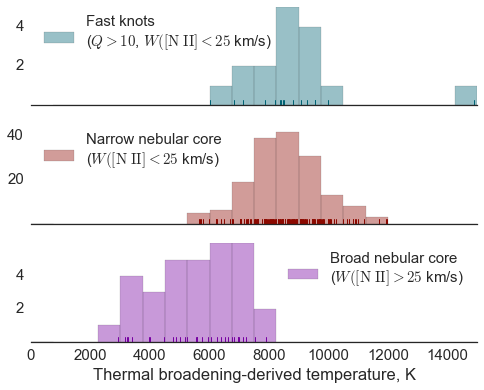

In [177]:
def func(T4, Wha, Wnii):
    return predicted_Ha_width(T4, Wnii) - Wha


def bracket_root(f, a=0.5, b=1.5, args=[], grow=1.5, nmax=5):
    """Check if function `f` has a root bracketed in the range 
    [`a`, `b`] and, if it does not, then widen the interval 
    by multiplying `b` and dividing `a` by the 
    factor `grow` and trying again.  Repeat at most `nmax` times.  
    Return the final interval [`a`, `b`]
    
    """
    for iteration in range(nmax):
        if f(a, *args)*f(b, *args) <= 0.0:
            return a, b
        else:
            a /= grow
            b *= grow
    return None, None


@np.vectorize
def findT4(Wha, Wnii):
    a, b = bracket_root(func, 0.5, 1.2, [Wha, Wnii])
    if a is not None:
        T4 = brentq(func, a, b, args=(Wha, Wnii))
    else:
        T4 = np.nan
    return T4

   
def T_sample(group=fast, Qmin=10.0):
    dd = d[group & (d.Q.nii >= Qmin) & (d.W.ha > d.W.nii)]
    T4 = findT4(dd.W.ha, dd.W.nii)
    return 1e4*T4[np.isfinite(T4)]


def Tc_sample(mask=True):
    dd = d[mask & (d.Wc.ha > d.Wc.nii)]
    T4 = findT4(dd.Wc.ha, dd.Wc.nii)
    return 1e4*T4[np.isfinite(T4)]


sns.set(style='white', context='notebook', font_scale=1.5)
fig, axes = plt.subplots(3, 1, figsize=(8, 6), sharex=True)
sns.despine(fig, left=True)

sns.distplot(T_sample(fast & (d.W.nii <=25), 30), 
             hist_kws={'range': [0, 1.5e4]},
             ax=axes[0], color='c', 
             label='Fast knots\n' + r'($Q > 10$, $W(\mathrm{[N\ II]} < 25$ km/s)',
             kde=False, rug=True, bins=20)

m = (d.Wc.nii > 25.0) #& (d.Vc.nii < 17.0) 
sns.distplot(Tc_sample(~m), 
             hist_kws={'range': [0, 1.5e4]},
             label='Narrow nebular core\n' + r'($W(\mathrm{[N\ II]} < 25$ km/s)',
             ax=axes[1], color='r',
             kde=False, rug=True, bins=20)

sns.distplot(Tc_sample(m), 
             hist_kws={'range': [0, 1.5e4]},
             label='Broad nebular core\n' + r'($W(\mathrm{[N\ II]} > 25$ km/s)',
             ax=axes[2], color='m',
             kde=False, rug=True, bins=20)


for ax in axes:
    ax.legend(loc='best')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_major_locator(MaxNLocator(4, integer=True, prune='both'))
    ax.set(
        xlim=[0, 15000],
    )
axes[-1].set(
    xlabel='Thermal broadening-derived temperature, K'
)
fig.savefig('knot-and-core-derived-temperatures.pdf')

### Knots with anomalously high [N II] width

In some cases, such as 4288-559, the problem is that there are two components and the redder one is relatively stronger in [N II].  A sign of this is a high $\chi^2$ for the [N II] knot fit.


In [81]:
m = (d['W', 'nii'] + d['dW-', 'nii']> d['W', 'ha']) & (d.V.ha < -40.0)
d[m][['Q', 'chi2', 'A', 'V', 'W']]


Q                 chi2            \
line                                ha        nii        ha       nii   
knot     slit                                                           
4246-556 YY1000-2013-02-232   7.528208  12.441612  0.911885  1.265677   
4251-748 XX1620-2010-01-236  11.271361   5.137241  0.846474  0.824174   
4252-514 YY1085-2013-02-159   2.356494   2.631916  0.936300  0.783191   
4253-757 XX1620-2010-01-236  15.553486   7.093122  0.882340  0.766784   
4257-455 YY1120-2013-02-029   2.641125   5.412650  0.680175  1.623793   
4259-615 XX1601-2010-01-248  42.197956  29.617300  6.005247  1.209873   
         XX1609-2010-01-219  62.167476  36.044184  4.346699  3.338932   
4295-603 YY0971-2013-02-237   9.729720   3.638739  3.459922  1.051041   
4305-618 YY0955-2013-02-169   2.917083   3.957889  2.461584  0.978932   
4309-511 YY1120-2013-02-029   7.385007   5.462786  1.154397  1.031776   
4381-552 YY1000-2013-02-232   1.130584   3.871379  0.735477  1.038884   

                                    A                    V             \
line                               ha       nii         ha        nii   
knot     slit                                                           
4246-556 YY1000-2013-02-232  0.029288  0.022700 -99.006229 -94.704164   
4251-748 XX1620-2010-01-236  0.039041  0.018050 -64.851155 -70.123772   
4252-514 YY1085-2013-02-159  0.016896  0.009076 -64.269495 -70.000000   
4253-757 XX1620-2010-01-236  0.129272  0.044658 -58.086838 -61.504241   
4257-455 YY1120-2013-02-029  0.016322  0.010914 -52.334847 -56.501671   
4259-615 XX1601-2010-01-248  0.809621  0.376095 -63.875150 -61.759893   
         XX1609-2010-01-219  0.340591  0.146154 -68.369429 -66.618579   
4295-603 YY0971-2013-02-237  0.016412  0.004592 -60.383428 -52.497160   
4305-618 YY0955-2013-02-169  0.016982  0.011255 -61.921089 -68.994060   
4309-511 YY1120-2013-02-029  0.057016  0.015233 -55.009784 -54.673981   
4381-552 YY1000-2013-02-232  0.008993  0.008248 -99.204992 -92.590120   

                                     W             
line                                ha        nii  
knot     slit                                      
4246-556 YY1000-2013-02-232  19.836465  25.097043  
4251-748 XX1620-2010-01-236  28.934765  39.052263  
4252-514 YY1085-2013-02-159  21.650747  42.259409  
4253-757 XX1620-2010-01-236  26.254024  36.360768  
4257-455 YY1120-2013-02-029  18.108457  24.520445  
4259-615 XX1601-2010-01-248  27.979131  32.322176  
         XX1609-2010-01-219  31.548789  33.414085  
4295-603 YY0971-2013-02-237  26.753807  58.870501  
4305-618 YY0955-2013-02-169  19.260053  50.172082  
4309-511 YY1120-2013-02-029  34.883072  58.870501  
4381-552 YY1000-2013-02-232  14.346656  30.129779

Cases where the nebular width is large:

In [82]:
m = d0.Wc.nii > 26.0
d0[m][['Vc', 'Wc']]

Vc                    Wc           
line                                  ha        nii         ha        nii
knot     slit                                                            
051-420  XX0430-2007-01-054    13.200697  18.939808  32.870120  29.312177
         XX0443-2007-01-067    14.195589  17.981246  33.043746  29.441205
         XX0447-2007-01-072    13.466497  17.992880  31.567486  29.694511
103-325  YY1314-2013-12-086    13.970296  19.754471  34.057994  27.697621
4246-556 YY1000-2013-02-232    17.273173  14.111832  27.553630  26.423100
4266-614 XX1595-2010-01-145    18.336936  17.059329  33.321257  26.006057
4269-610 XX1585-2010-01-214    18.557661  16.150509  31.064942  26.386827
4284-307 XX1557-2010-01-133    17.207227  15.313069  30.998864  27.588318
         XX1558-2010-01-128    17.854685  15.740684  31.920457  28.734414
4332-419 XX1389-2010-01-078    20.106163  21.844686  33.024042  26.841409
4333-403 XX1389-2010-01-078    16.257974  19.167262  30.873886  26.246912
4337-210 XX1389-2010-01-078     9.880704   9.481585  36.541160  33.830355
4344-512 YY1112-2013-02-033    18.869490  20.763031  31.287810  26.450037
         YY1120-2013-02-029    20.998950  21.061249  32.535053  26.106047
4356-525 YY1058-2013-02-149    17.230917  16.658469  33.796530  28.856014
         YY1068-2013-02-154    17.316186  16.583464  33.102099  28.616467
4363-514 YY1085-2013-02-159    17.633164  16.063670  33.564899  29.660743
4368-523 YY1068-2013-02-154    16.739232  15.422938  32.478000  28.788103
4374-457 YY1112-2013-02-033    13.214992  11.669006  31.952597  27.419433
         YY1120-2013-02-029    14.736659  12.584811  32.322090  27.727206
4378-526 XX1259-2006-02-313    17.064498  17.427312  33.877765  29.128872
         YY1058-2013-02-149    16.379976  16.119291  34.056946  28.938281
         YY1068-2013-02-154    16.790239  16.061899  32.477757  28.560333
4380-417 XX1251-2007-01b-2057  15.731405  13.112938  33.428908  27.909839
4380-519 YY1068-2013-02-154    16.912413  16.440534  33.471843  27.667374
         YY1085-2013-02-159    15.442994  13.859997  32.301886  27.995412
4381-409 XX1232-2007-01b-2053  16.853069  16.847941  31.182394  27.692767
         XX1251-2007-01b-2057  17.595817  17.655139  32.189381  27.251010
         XX1259-2006-02-313    15.675190  16.196512  33.383691  30.200807
4381-438 XX1251-2007-01b-2057  13.753918  12.247457  34.893171  29.531737
...                                  ...        ...        ...        ...
4397-544 XX1182-2006-02-291    16.543059  16.321847  33.746879  29.200053
         XX1189-2006-02-296    16.201587  17.077164  34.439200  30.061737
         XX1189-2007-01b-2041  15.718439  15.563754  32.722956  28.930021
         XX1197-2006-02-303    17.179176  17.836514  33.203485  29.076381
         XX1204-2007-01b-2045  16.772096  17.059004  33.541801  28.407852
         XX1218-2007-01b-2049  17.184707  17.491398  34.263982  28.541942
         XX1232-2007-01b-2053  17.404255  17.141149  34.573179  28.538674
         XX1251-2007-01b-2057  17.312971  16.807559  33.433319  28.281583
         YY1000-2013-02-232    17.205863  16.976688  32.407426  27.687878
         YY1019-2013-02-226    16.245798  15.698633  32.820158  29.120345
4399-332 XX1189-2007-01b-2041  18.977928  21.931400  33.254938  27.085194
         XX1197-2006-02-303    18.338017  21.667653  32.281286  26.275021
4402-526 YY1058-2013-02-149    15.134617  14.734249  32.035768  29.062945
         YY1068-2013-02-154    16.166885  15.115470  32.659953  27.766316
4406-246 XX1141-2007-01b-2061  17.859021  19.207334  35.329037  28.108027
4406-345 XX1162-2006-02-260    18.281314  21.875860  33.276901  26.122607
         XX1166-2006-02-270    18.740506  22.572978  33.812775  27.063148
         XX1170-2006-02-276    17.805496  20.876496  32.145816  26.346394
         XX1176-2006-02-281    13.971591  19.565501  30.939659  27.322825
         XX1180-2006-02-286    15.891064  19.231481  31.532083  27.878842
         XX1182-2006-02-291    16.049226  

So those are mostly in the less W parts, which is interesting

#### The case of 4257-614

*It turns out that I had two different knots with the same name, which is part of the reason for the confusion here!! Fixed now*

This has a presence in the above table, but for only two slits out of 7.  It is the brightest knot in the table.  In one case (XX1609), the fit to the Ha line has a component that is too broad, and oversubtracts from the knot profile, which maked it appear to have a smaller width than it probably really ought to have.  In the second case (XX1620), the difference in widths is small - but there is nothing obviously wrong with the fits.  It really does look like there is no estra thermal broadening of Ha wrt [N II].  In a third slit, there is also very little difference between the [N II] and Ha widths. This seems due to a poor fit to the [N II] line, which probably needs two components.

In [22]:
d.loc['4257-614'][['Q', 'chi2', 'A', 'V', 'W', 'dW-', 'dW+']]

Q                 chi2                   A  \
line                        ha        nii        ha       nii        ha   
slit                                                                      
XX1609-2010-01-219   18.385502  76.692212  1.139264  3.197503  0.101380   
XX1620-2010-01-236   86.206274  48.710907  1.927594  3.796573  0.477716   
XX1633-2010-01-240   81.322529  42.262700  0.935804  1.078315  0.616295   
XX1646-2010-01-244   36.020222  17.730474  0.662219  0.577403  0.299849   
YY0955-2013-02-169   68.298380  44.211203  2.621595  5.464406  0.277915   
YY0971-2013-02-237  113.660734  94.840548  1.814263  1.967819  0.429840   

                                      V                     W             \
line                     nii         ha        nii         ha        nii   
slit                                                                       
XX1609-2010-01-219  0.521550 -70.973018 -61.317498  23.156261  32.612348   
XX1620-2010-01-236  0.314330 -68.254468 -65.700994  26.773645  27.426680   
XX1633-2010-01-240  0.318551 -70.451503 -70.553065  24.882101  15.030105   
XX1646-2010-01-244  0.182460 -68.314777 -69.217925  24.985388  13.921377   
YY0955-2013-02-169  0.116090 -66.800880 -64.839372  38.051505  38.339970   
YY0971-2013-02-237  0.201957 -64.160690 -63.939757  36.448180  31.035684   

                         dW-                 dW+            
line                      ha       nii        ha       nii  
slit                                                        
XX1609-2010-01-219 -1.373726 -0.515186  1.457887  0.527312  
XX1620-2010-01-236 -0.352823 -0.623640  0.358673  0.640073  
XX1633-2010-01-240 -0.352550 -0.405695  0.357753  0.417011  
XX1646-2010-01-244 -0.783929 -0.877162  0.809793  0.939155  
YY0955-2013-02-169 -0.704781 -1.060792  0.728127  1.116483  
YY0971-2013-02-237 -0.403010 -0.388135  0.410630  0.394765

### Knots with high thermal width (greater than 10,000 K)

The first two of these look the most significant

In [23]:
mth = (d['W', 'ha'] + d['dW-', 'ha'] > predicted_Ha_width(1.0, d['W', 'nii'])) & (d['Q', 'nii'] >  3.0)
d[mth][['Q', 'chi2', 'A', 'V', 'W']]


Q                 chi2            \
line                                 ha        nii        ha       nii   
knot     slit                                                            
4259-618 XX1609-2010-01-219  122.784181  62.257901  3.260233  1.147259   
4260-625 XX1609-2010-01-219   75.735953  62.922111  2.213418  1.129051   
4289-539 XX1523-2010-01-202   12.814190   4.322922  0.683628  0.943051   

                                    A                    V             \
line                               ha       nii         ha        nii   
knot     slit                                                           
4259-618 XX1609-2010-01-219  0.474936  0.227780 -57.237924 -57.957740   
4260-625 XX1609-2010-01-219  0.710663  0.402991 -58.170618 -59.161346   
4289-539 XX1523-2010-01-202  0.076142  0.030771 -67.498332 -67.562041   

                                     W             
line                                ha        nii  
knot     slit                                      
4259-618 XX1609-2010-01-219  43.094291  35.717082  
4260-625 XX1609-2010-01-219  38.104218  29.940501  
4289-539 XX1523-2010-01-202  29.167976  13.546786

When we look at the 4259-618 knot, it is clear that there are two problems: (1) The knot clearly has two components at -50 and -70 km/s; (2) there is another component at around 0 km/s, which is omitted in Ha in the problematic slit. 

In [24]:
d.loc['4259-618'][['Q', 'chi2', 'A', 'V', 'W', 'dW-', 'dW+']]

Q                 chi2                   A  \
line                        ha        nii        ha       nii        ha   
slit                                                                      
XX1601-2010-01-248   53.423287  18.786760  1.611890  1.191688  0.289258   
XX1609-2010-01-219  122.784181  62.257901  3.260233  1.147259  0.474936   

                                      V                     W             \
line                     nii         ha        nii         ha        nii   
slit                                                                       
XX1601-2010-01-248  0.125162 -59.745443 -58.312087  42.797807  40.099560   
XX1609-2010-01-219  0.227780 -57.237924 -57.957740  43.094291  35.717082   

                         dW-                 dW+            
line                      ha       nii        ha       nii  
slit                                                        
XX1601-2010-01-248 -1.162360 -2.511858  1.210070  2.697504  
XX1609-2010-01-219 -0.521099 -0.762032  0.532956  0.787928

The other one is 4260-625, which is similar in many ways.  The high thermal width is again in XX1609 slit, and is again due to a 0 km/s component that is fitted in [N II] but omitted in Ha.  Also, both this knot and the previous one have failed fits in the YY0955 slit.  This is despite the very high s/n, and is probably because the knot $\chi^2$ was too high due to multiple components.

In [25]:
d.loc['4260-625'][['Q', 'chi2', 'A', 'V', 'W', 'dW-', 'dW+']]

Q                  chi2                   A  \
line                        ha         nii        ha       nii        ha   
slit                                                                       
XX1595-2010-01-145   27.064213   15.108160  1.324554  0.909391  0.757591   
XX1601-2010-01-248   45.116394   29.857345  1.542940  0.991479  0.778666   
XX1609-2010-01-219   75.735953   62.922111  2.213418  1.129051  0.710663   
YY0936-2013-02-165  102.847850  118.034307  1.601511  2.827577  0.853645   

                                      V                     W             \
line                     nii         ha        nii         ha        nii   
slit                                                                       
XX1595-2010-01-145  0.377243 -53.812054 -51.923051  33.229832  24.630905   
XX1601-2010-01-248  0.383603 -60.087488 -59.330141  35.735400  35.230044   
XX1609-2010-01-219  0.402991 -58.170618 -59.161346  38.104218  29.940501   
YY0936-2013-02-165  0.464485 -58.923884 -59.421722  33.607634  30.194791   

                         dW-                 dW+            
line                      ha       nii        ha       nii  
slit                                                        
XX1595-2010-01-145 -1.458378 -1.866160  1.539329  2.024955  
XX1601-2010-01-248 -0.942052 -1.384067  0.979932  1.461121  
XX1609-2010-01-219 -0.647900 -0.565747  0.667135  0.578518  
YY0936-2013-02-165 -0.394238 -0.298561  0.401520  0.302866

### Knots where the core has anomalously high [N II] width

This seems to indicate a problem with the width determination for the core.

In [26]:
m2 = (d['Wc', 'nii'] - d['Wc', 'ha']) > 20.0
d[m2][['Vc', 'Wc', 'Fc', 'chi2c']]

Vc                    Wc              \
line                                ha        nii         ha         nii   
knot     slit                                                              
4253-655 XX1616-2010-01-157  18.811276  19.449968  57.372805   88.296624   
4259-618 XX1601-2010-01-248  15.793311  17.034892  64.726333  102.700082   
4260-625 XX1595-2010-01-145  16.920346  18.741788  67.097675  118.262427   
4262-629 XX1595-2010-01-145  15.933109  18.845274  74.765693  131.121554   
4267-616 XX1575-2010-01-137  17.594555  18.900465  50.404860   81.323765   
         XX1595-2010-01-145  17.476537  19.188064  69.145939  112.201058   
4269-548 XX1568-2010-01-210  17.865316  17.849296  46.305607   66.947678   
         XX1575-2010-01-137  17.928684  18.638237  46.422360   77.545625   
4276-549 XX1557-2010-01-133  17.698174  18.643833  50.011573   80.358746   
4277-539 XX1557-2010-01-133  18.120357  18.566026  46.380528   72.024456   

                                     Fc                 chi2c            
line                                 ha         nii        ha       nii  
knot     slit                                                            
4253-655 XX1616-2010-01-157  207.923443   68.239482  0.549300  0.544381  
4259-618 XX1601-2010-01-248  107.124648   38.829361  2.939687  0.615137  
4260-625 XX1595-2010-01-145  340.526893  104.501574  0.698657  0.819166  
4262-629 XX1595-2010-01-145  194.516305   61.667428  0.674382  0.898462  
4267-616 XX1575-2010-01-137  400.120442  117.073656  0.882800  0.492608  
         XX1595-2010-01-145  491.862357  157.280737  0.914666  0.736217  
4269-548 XX1568-2010-01-210  209.520767   62.736252  0.324770  0.356913  
         XX1575-2010-01-137  314.432379   89.832025  0.415164  0.421729  
4276-549 XX1557-2010-01-133  126.992480   37.394331  0.403100  0.405110  
4277-539 XX1557-2010-01-133  167.459675   47.783812  0.842465  0.429420

Look at the other slits for the first of these two: 4258-744.  Lots more slits, but they are all mediocre.  The best one is XX1609 and that has reasonable values (just about).

In [255]:
d.loc['4258-744'][['Q', 'Wc', 'A', 'V', 'W', 'dW-', 'dW+']]

Q                   Wc                     A  \
line                       ha       nii         ha         nii        ha   
slit                                                                       
XX1575-2010-01-137   7.639478  2.800093  47.442134   69.887127  0.061532   
XX1585-2010-01-214   0.000000  6.466403  40.635376   39.961053  0.150702   
XX1595-2010-01-145   3.455717       NaN  72.669532   92.134014  0.131729   
XX1601-2010-01-248  21.194910  3.291020  42.503490   67.794163  0.232399   
XX1609-2010-01-219  38.271456  9.890997  46.973581   53.219285  0.288547   
XX1616-2010-01-157   4.453361  2.582629  70.798917  104.523896  0.065581   
XX1620-2010-01-236  22.178583  7.431594  43.876830   51.038861  0.137940   

                                      V                     W             \
line                     nii         ha        nii         ha        nii   
slit                                                                       
XX1575-2010-01-137  0.014102 -57.213642 -78.878581  36.184965  62.081286   
XX1585-2010-01-214  0.042798 -61.558442 -65.878982        NaN  31.027462   
XX1595-2010-01-145  0.047315 -66.378227 -57.551341  29.199526   7.064460   
XX1601-2010-01-248  0.062618 -60.817627 -68.331156  31.748502  40.795675   
XX1609-2010-01-219  0.086525 -59.019956 -61.508151  30.473789  29.790755   
XX1616-2010-01-157  0.039691 -58.891218 -60.617974  39.397866  34.156812   
XX1620-2010-01-236  0.044091 -57.801957 -62.431786  29.007601  39.638174   

                         dW-                   dW+             
line                      ha        nii         ha        nii  
slit                                                           
XX1575-2010-01-137 -5.023674 -21.072589   6.027187        NaN  
XX1585-2010-01-214       NaN  -5.859227        NaN   7.607065  
XX1595-2010-01-145 -7.486394        NaN  10.287196        NaN  
XX1601-2010-01-248 -1.727387 -16.640021   1.846122  17.382462  
XX1609-2010-01-219 -0.924232  -3.785276   0.957574   4.309353  
XX1616-2010-01-157 -9.087787 -15.699566  11.456455  24.696095  
XX1620-2010-01-236 -1.484766  -6.247371   1.572749   7.418174

The second one is interesting because it is a very-high-velocity knot, with -90 km/s.  Many slits but all pretty marginal.  But **YY1068** is the best: reasonable values.

In [43]:
d.loc['4402-524'][['Q', 'Wc', 'A', 'V', 'W', 'dW-', 'dW+']]

Q                   Wc                    A  \
line                        ha       nii         ha        nii        ha   
slit                                                                       
XX1182-2006-02-291         NaN  1.701881  46.813447  61.330422  0.006062   
XX1189-2006-02-296         NaN  0.456167  51.279890  85.404720  0.011962   
XX1189-2007-01b-2041  2.102435  1.635565  45.151016  56.705449  0.010704   
XX1197-2006-02-303         NaN  1.251367  55.051053  89.430649  0.000000   
YY1058-2013-02-149    2.325999  1.927705  47.637280  56.640126  0.006408   
YY1068-2013-02-154    3.628866  2.719853  45.552613  51.290961  0.014605   

                                         V                      W             \
line                       nii          ha         nii         ha        nii   
slit                                                                           
XX1182-2006-02-291    0.007814 -102.108884 -100.471739   7.064460  13.585922   
XX1189-2006-02-296    0.007451 -114.460225 -117.640514   7.064460  51.382831   
XX1189-2007-01b-2041  0.005616  -99.426538 -105.632947  18.099043  26.499291   
XX1197-2006-02-303    0.011873 -101.571910  -83.595076  13.191987  13.623360   
YY1058-2013-02-149    0.002069  -90.796656  -92.530635  28.874417  44.780536   
YY1068-2013-02-154    0.005407  -84.932511  -89.804938  36.247416  33.796661   

                            dW-                   dW+             
line                         ha        nii         ha        nii  
slit                                                              
XX1182-2006-02-291          NaN        NaN        NaN   9.392365  
XX1189-2006-02-296          NaN -39.923367        NaN        NaN  
XX1189-2007-01b-2041  -7.919563 -13.259332  14.708589        NaN  
XX1197-2006-02-303          NaN        NaN        NaN  16.855220  
YY1058-2013-02-149   -11.298623 -25.974673  30.774106        NaN  
YY1068-2013-02-154    -9.611160 -12.009535  10.946048  23.162318

## Plot line ratios

In [208]:
R_CORRECTION = 1.13
R = R_CORRECTION * d.A.nii * d.W.nii / (d.A.ha * d.W.ha)
Rc = R_CORRECTION * d.Fc.nii / d.Fc.ha
Rf = R_CORRECTION * d.F.nii / d.F.ha

rd = pd.DataFrame(data={'Q': d.Q.nii, 'Rc': Rc, 'Rf': Rf, 'R': R})

rd['dR+'] = rd.R*np.hypot(d['dA-'].ha/d.A.ha, d['dA+'].nii/d.A.nii)
rd['dR-'] = -rd.R*np.hypot(d['dA+'].ha/d.A.ha, d['dA-'].nii/d.A.nii)
rd['V'] = d.V.mean(axis=1)
rd['W'] = d.W.ha
rd['dW+'] = d['dW+'].ha
rd['dW-'] = d['dW-'].ha

rd['A'] = d.A.ha
rd['dA+'] = d['dA+'].ha
rd['dA-'] = d['dA-'].ha


rd['Contrast'] = d.F.ha / d.Fc.ha

rd[rd.R > 0.7]

Q         R        Rc        Rf  \
knot     slit                                                          
4240-512 YY1085-2013-02-159   4.261120  1.021987  0.366129  1.021987   
4240-618 YY0955-2013-02-169   4.778862  0.826403  0.404968  0.826403   
4246-556 YY1000-2013-02-232  12.441612  1.108069  0.426965  1.108069   
4248-552 XX1633-2010-01-240  40.926719  0.745913  0.370756  0.745913   
         XX1646-2010-01-244  49.362220  0.704139  0.381277  0.704139   
4251-609 XX1633-2010-01-240   6.867895  0.870649  0.418386  0.870649   
4251-748 XX1620-2010-01-236   5.137241  0.705128  0.410813  0.705128   
4252-514 YY1085-2013-02-159   2.631916  1.184721  0.351204  1.184717   
4254-708 XX1620-2010-01-236   3.116452  1.258468  0.393431  1.258468   
4257-455 YY1120-2013-02-029   5.412650  1.023116  0.345898  1.023116   
4260-649 XX1601-2010-01-248   3.731674  1.876134  0.364556  1.876134   
4270-514 XX1575-2010-01-137  13.799603  0.841311  0.339257  0.841311   
4293-326 XX1523-2010-01-202  21.153010  0.712552  0.325563  0.712552   
4303-520 YY1085-2013-02-159   2.105402  3.462822  0.349652  3.462822   
4305-618 YY0955-2013-02-169   3.957889  1.950902  0.348488  1.950779   
4328-601 XX1389-2010-01-078   1.083222  1.561293  0.367116  1.561254   
4333-403 XX1389-2010-01-078   3.627116  0.860667  0.301915  0.860667   
4368-523 YY1068-2013-02-154   1.637102  1.103019  0.286068  1.103018   
4381-552 YY1000-2013-02-232   3.871379  2.176612  0.251187  2.176605   
4398-305 XX1197-2006-02-303   1.293318  1.221326  0.309598  1.221326   
4402-526 YY1058-2013-02-149   2.398705  1.478353  0.215436  1.478353   
4406-514 XX1170-2006-02-276   1.191693  1.863496  0.225063  1.863496   
4407-259 XX1166-2006-02-270   4.045403  2.317624  0.329412  2.152904   

                                  dR+       dR-           V          W  \
knot     slit                                                            
4240-512 YY1085-2013-02-159  0.363061 -0.370240  -51.976535  18.222073   
4240-618 YY0955-2013-02-169  0.229885 -0.204711  -20.000000  21.637964   
4246-556 YY1000-2013-02-232  0.169968 -0.174145  -96.855196  19.836465   
4248-552 XX1633-2010-01-240  0.024812 -0.024734  -13.165140  20.852588   
         XX1646-2010-01-244  0.018916 -0.018879  -13.536982  27.580358   
4251-609 XX1633-2010-01-240  0.166150 -0.164765  -80.854568  23.635846   
4251-748 XX1620-2010-01-236  0.155104 -0.146635  -67.487464  28.934765   
4252-514 YY1085-2013-02-159  0.676137 -0.675477  -67.134747  21.650747   
4254-708 XX1620-2010-01-236  0.575602 -0.576807  -59.145180  14.820866   
4257-455 YY1120-2013-02-029  0.414181 -0.448296  -54.418259  18.108457   
4260-649 XX1601-2010-01-248  0.657170 -0.850463  -25.077736  14.793521   
4270-514 XX1575-2010-01-137  0.073697 -0.075593   -8.573503  23.861226   
4293-326 XX1523-2010-01-202  0.033169 -0.038829   -6.511181  19.360538   
4303-520 YY1085-2013-02-159       NaN -4.001150  -50.389156  11.774100   
4305-618 YY0955-2013-02-169  0.826027 -0.836921  -65.457574  19.260053   
4328-601 XX1389-2010-01-078  1.962694 -1.335212  -65.080428  12.897581   
4333-403 XX1389-2010-01-078  0.332247 -0.348248  -65.508352  16.849840   
4368-523 YY1068-2013-02-154  1.010915 -1.031040  -94.621915  18.409603   
4381-552 YY1000-2013-02-232  1.890354 -2.122189  -95.897556  14.346656   
4398-305 XX1197-2006-02-303  1.312558 -1.274328  -58.389028  11.774100   
4402-526 YY1058-2013-02-149  1.537750 -1.838849  -91.418829  16.303394   
4406-514 XX1170-2006-02-276       NaN -4.032392  -77.836090  11.774100   
4407-259 XX1166-2006-02-270  1.264293 -1.421108 -125.000000  42.637938   

                                   dW+        dW-         A       dA+  \
knot     slit                                                           
4240-512 YY1085-2013-02-159   5.894924  -4.798255  0.022054  0.006247   
4240-618 YY0955-2013-02-169   5.008799  -3.705490  0.048833  0.007899   
4246-556 YY1000-2013-02-232   3.170707  -2.759228  0.029288  0.003974   
4248-552 XX1633-2010

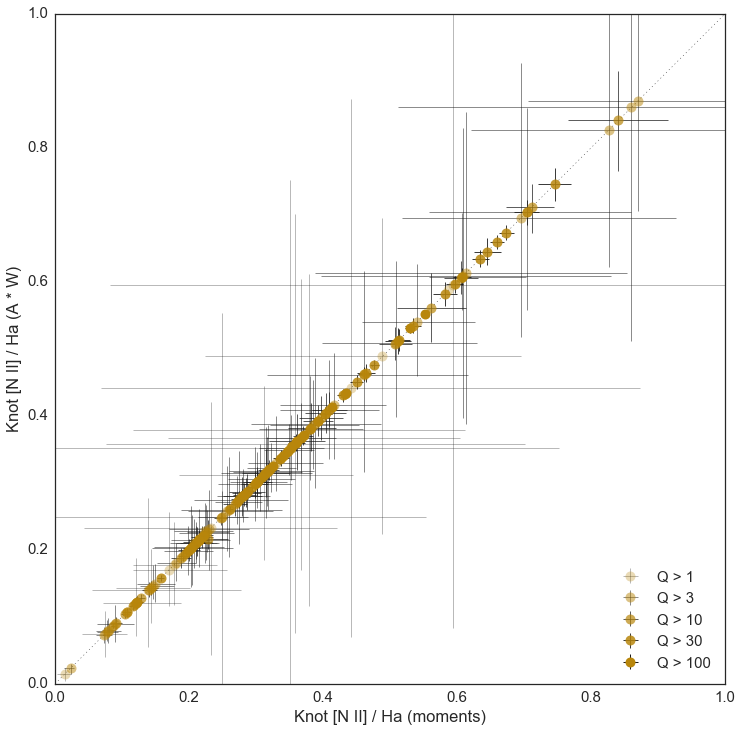

In [209]:
fig, ax = plt.subplots(1, 1)

ax.plot([0.0, 1.0], [0.0, 1.0], ls=':', c='k', lw=0.5)
thresholds = 1.0, 3.0, 10.0, 30.0, 100.0
next_threshes = thresholds[1:] + (1e20,)
# alphas = 0.05, 0.1, 0.2, 0.6, 1.0
alphas = 0.3, 0.5, 0.7, 0.85, 1.0
for threshold, next_thresh, alpha in zip(thresholds, next_threshes, alphas):
    dd = rd[(rd['Q'] >= threshold) & (rd['Q'] < next_thresh)]
    dx = dd[['dR-', 'dR+']].T.values
    ax.errorbar(dd.Rf, dd.R, 
                xerr=np.abs(dx), yerr=np.abs(dx), 
                fmt='.', color='y', alpha=alpha, ms=20.0,
                elinewidth=1.0, ecolor='k', barsabove=True,
                label='Q > {}'.format(int(threshold)),
               )
   
        
ax.legend(loc='lower right')
ax.set(aspect='equal', 
       xlim=[0.0, 1.0], ylim=[0.0, 1.0],
       xlabel='Knot [N II] / Ha (moments)',
       ylabel='Knot [N II] / Ha (A * W)'
      )
fig.set_size_inches(12.0, 12.0)


### Nebula line ratio versus knot line ratio

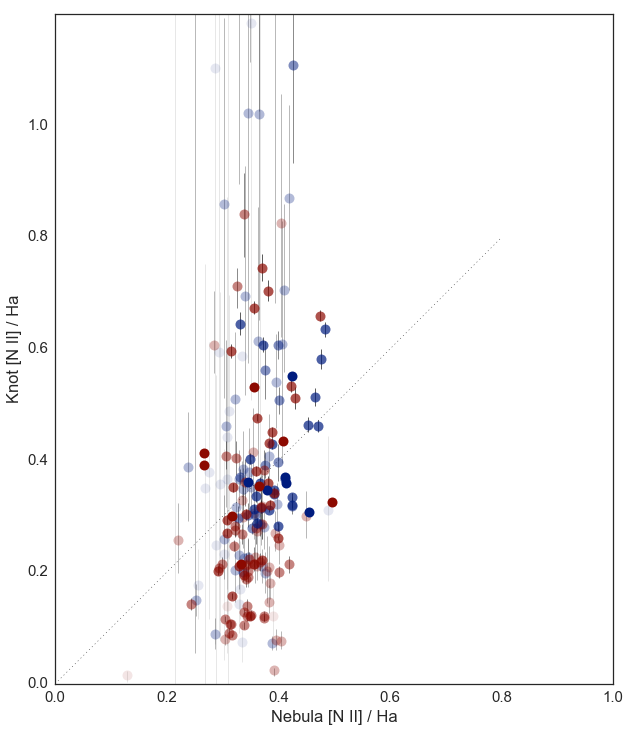

In [210]:
fig, ax = plt.subplots(1, 1)

ax.plot([0.0, 0.8], [0.0, 0.8], ls=':', c='k', lw=0.5)
thresholds = 1.0, 3.0, 10.0, 30.0, 100.0
next_threshes = thresholds[1:] + (1e20,)
# alphas = 0.05, 0.1, 0.2, 0.6, 1.0
alphas = 0.1, 0.3, 0.5, 0.7, 1.0

mslow = rd['V'] > -40.0
mfast = ~mslow

for threshold, next_thresh, alpha in zip(thresholds, next_threshes, alphas):

    for color, mask, label in ['b', mfast, 'Q > {}'.format(int(threshold))], ['r', mslow, None]:
    
        dd = rd[mask & (rd['Q'] >= threshold) & (rd['Q'] < next_thresh)]
        dy = dd[['dR-', 'dR+']].T.values
        ax.errorbar(dd.Rc, dd.R, 
                yerr=np.abs(dy), 
                fmt='.', color=color, alpha=alpha, ms=20.0,
                elinewidth=1.0, ecolor='k', barsabove=True,
                label=label
               )
   
        
#ax.legend(loc='lower right')
ax.set(aspect='equal', 
       xlim=[0.0, 1.0], ylim=[0.0, 1.2],
       xlabel='Nebula [N II] / Ha',
       ylabel='Knot [N II] / Ha'
      )
fig.set_size_inches(12.0, 12.0)

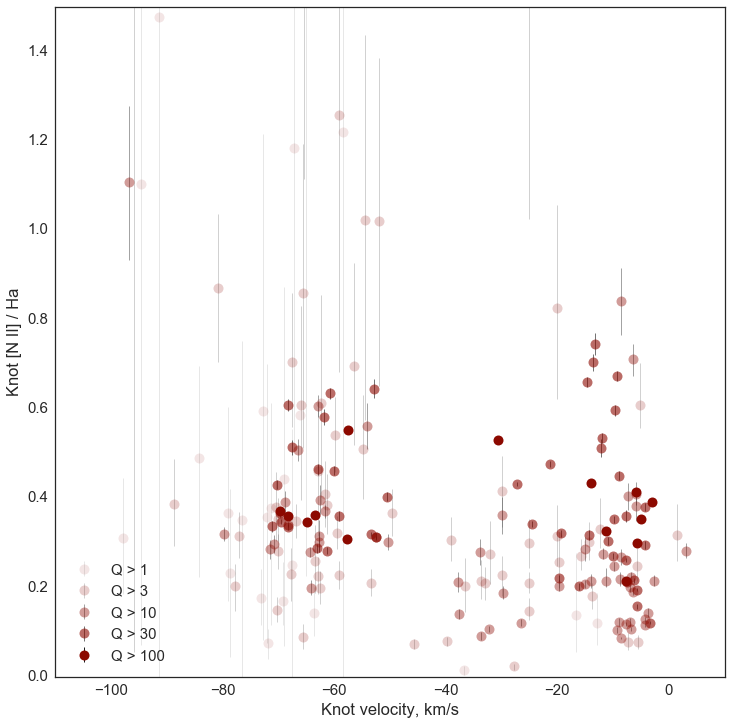

In [211]:
fig, ax = plt.subplots(1, 1)

vmin, vmax = -110, 10
thresholds = 1.0, 3.0, 10.0, 30.0, 100.0
next_threshes = thresholds[1:] + (1e20,)
alphas = 0.1, 0.2, 0.4, 0.6, 1.0
for threshold, next_thresh, alpha in zip(thresholds, next_threshes, alphas):
    dd = rd[(rd['Q'] >= threshold) & (rd['Q'] < next_thresh)]
    dy = dd[['dR-', 'dR+']].T.values
    ax.errorbar(dd.V, dd.R, 
                yerr=np.abs(dy), 
                fmt='.', color='r', alpha=alpha, ms=20.0,
                elinewidth=1.0, ecolor='k', barsabove=True,
                label='Q > {}'.format(int(threshold)),
               )
ax.legend(loc='lower left')
ax.set( 
       xlim=[vmin, vmax], ylim=[0.0, 1.5],
       xlabel='Knot velocity, km/s',
       ylabel='Knot [N II] / Ha'
      )
fig.set_size_inches(12.0, 12.0)	

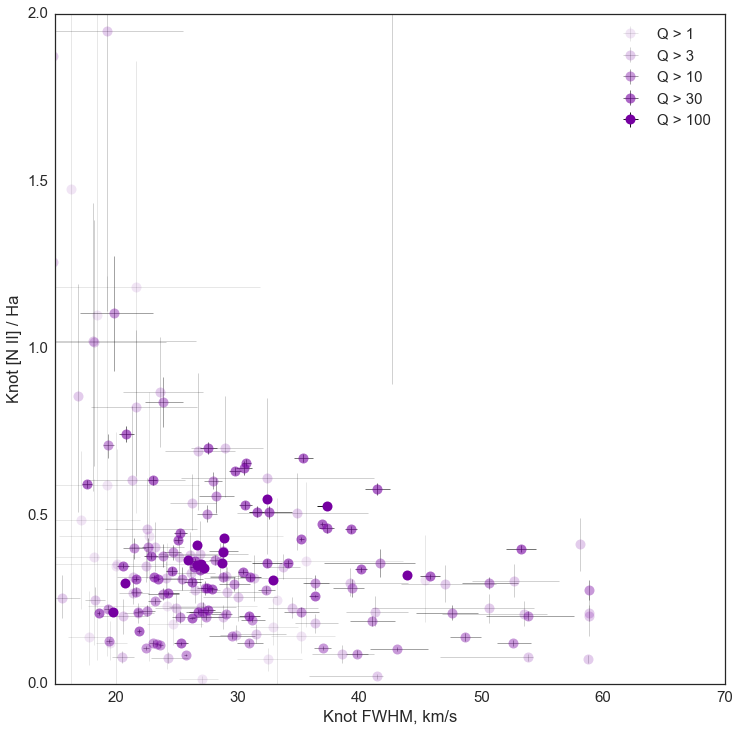

In [212]:
fig, ax = plt.subplots(1, 1)

wmin, wmax = 15, 70
thresholds = 1.0, 3.0, 10.0, 30.0, 100.0
next_threshes = thresholds[1:] + (1e20,)
alphas = 0.1, 0.2, 0.4, 0.6, 1.0
for threshold, next_thresh, alpha in zip(thresholds, next_threshes, alphas):
    dd = rd[(rd['Q'] >= threshold) & (rd['Q'] < next_thresh)]
    dx = dd[['dW-', 'dW+']].T.values
    dy = dd[['dR-', 'dR+']].T.values
    ax.errorbar(dd.W, dd.R, 
                xerr=np.abs(dx), yerr=np.abs(dy), 
                fmt='.', color='m', alpha=alpha, ms=20.0,
                elinewidth=1.0, ecolor='k', barsabove=True,
                label='Q > {}'.format(int(threshold)),
               )
ax.legend(loc='upper right')
ax.set( 
       xlim=[wmin, wmax], ylim=[0.0, 2.0],
       xlabel='Knot FWHM, km/s',
       ylabel='Knot [N II] / Ha'
      )
fig.set_size_inches(12.0, 12.0)

### Knot–nebula flux contrast versus knot line ratio

1. This shows a clear correlation, with higher [N II]/Ha for higher contrast.  The contrast almost seems bimodal, with division at ~= 0.01
2. There is also a correlation with knot velocity (color in the figure) for the high-contrast subset, with higher blue-shifts correlated with higher [N II]/Ha.
3. The knot line width (symbol size in the figure) seems to be smaller at higher contrast. 

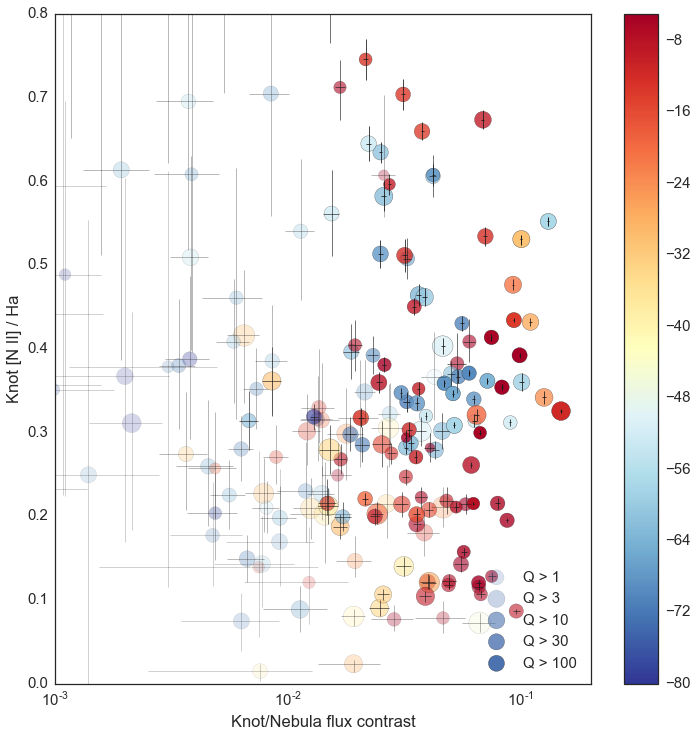

In [213]:
fig, ax = plt.subplots(1, 1)
#cmap = 'nipy_spectral'
cmap = 'RdYlBu_r'
cmin, cmax = 0.001, 0.2
thresholds = 1.0, 3.0, 10.0, 30.0, 100.0
next_threshes = thresholds[1:] + (1e20,)
alphas = 0.2, 0.3, 0.6, 0.8, 1.0
for threshold, next_thresh, alpha in zip(thresholds, next_threshes, alphas):
    dd = rd[(rd['Q'] >= threshold) & (rd['Q'] < next_thresh)]
    dx = dd.Contrast/dd.Q
    dy = dd[['dR-', 'dR+']].T.values
    scat = ax.scatter(dd.Contrast, dd.R, 
               cmap=cmap, c=dd.V, vmin=-80.0, vmax=-5.0,
               s=8*dd.W, alpha=alpha,
               label='Q > {}'.format(int(threshold)),
              )
    ax.errorbar(dd.Contrast, dd.R, 
                xerr=np.abs(dx), yerr=np.abs(dy), 
                fmt='none', color='c', alpha=alpha, ms=20.0,
                elinewidth=1.0, ecolor='k', barsabove=True,
                label=None,
               )
ax.legend(loc='lower right')
fig.colorbar(scat, ax=ax)
ax.set( 
       xlim=[cmin, cmax], ylim=[0.0, 0.8],
       xlabel='Knot/Nebula flux contrast',
       ylabel='Knot [N II] / Ha',
       xscale='log'
      )
fig.set_size_inches(12.0, 12.0)

### Knot peak intensity versus knot [N II]/Ha ratio

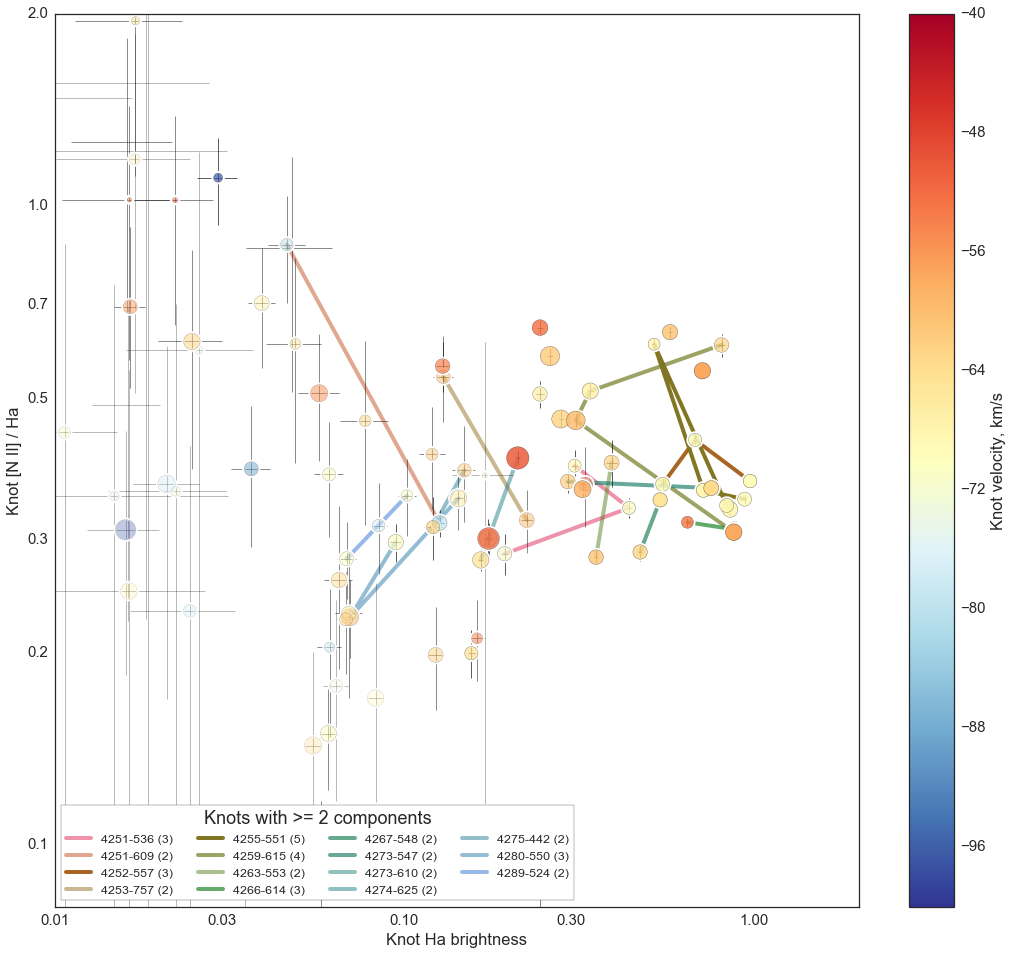

In [216]:
sns.set_palette(
    sns.husl_palette(20, l=0.5))
fig, ax = plt.subplots(1, 1)
#cmap = 'nipy_spectral'
cmap = 'RdYlBu_r'
amin, amax = 0.01, 2.0
thresholds = 1.0, 3.0, 10.0, 30.0, 100.0
next_threshes = thresholds[1:] + (1e20,)
alphas = 0.3, 0.5, 0.7, 0.85, 1.0
for threshold, next_thresh, alpha in zip(thresholds, next_threshes, alphas):
    dd = rd[mfast & (rd['Q'] >= threshold) & (rd['Q'] < next_thresh)]
    dx = dd[['dA-', 'dA+']].T.values
    dy = dd[['dR-', 'dR+']].T.values
    ss = 10*np.sqrt(dd.W**2 - (18.0)**2)
    scat = ax.scatter(dd.A, dd.R, 
                      facecolors='none', edgecolors='w', linewidths=3, 
               #zorder=0,
               s=ss+30, alpha=1.0,
               label=None,
              )
    scat = ax.scatter(dd.A, dd.R, 
               cmap=cmap, c=dd.V, vmin=-100.0, vmax=-40.0,
               s=ss, alpha=alpha,
               label=None,
              )
    ax.errorbar(dd.A, dd.R, 
                xerr=np.abs(dx), yerr=np.abs(dy), 
                fmt='none', color='c', alpha=alpha, ms=20.0,
                elinewidth=1.0, ecolor='k', barsabove=True,
                label=None, zorder=0
               )
# Join up the points from same knot
# Filter out any with NaNs in the ratio column
rdd = rd[mfast].groupby(level='knot').filter(lambda x: (np.isfinite(x.R).sum() > 1) )

for knotid, kdata in rdd.groupby(level='knot'):
    if kdata.Q.min() > 50.0:
        alpha = 1.0
    elif kdata.Q.min() > 25.0:
        alpha = 0.7
    else:
        alpha = 0.5
    _ = ax.plot('A', 'R', '-', data=kdata[np.isfinite(kdata.R)], 
                    lw=4, alpha=alpha, label='{} ({})'.format(knotid, len(kdata)), zorder=-1)

ax.legend(loc='lower left', ncol=4, fontsize='x-small', 
          title='Knots with >= 2 components', frameon=True)
cb = fig.colorbar(scat, ax=ax)
cb.set_label('Knot velocity, km/s')
ax.set( 
       xlim=[amin, amax], ylim=[0.08, 2.0], 
       xlabel='Knot Ha brightness',
       ylabel='Knot [N II] / Ha',
       xscale='log', yscale='log',
      )
yticks = [0.1, 0.2, 0.3, 0.5, 0.7, 1.0, 2.0]
xticks = [0.01, 0.03, 0.1, 0.3, 1.0]
ax.set_yticks(yticks)
ax.set_yticklabels(['{:.1f}'.format(_) for _ in yticks])
ax.set_xticks(xticks)
ax.set_xticklabels(['{:.2f}'.format(_) for _ in xticks])
fig.set_size_inches(18.0, 16.0)

In [254]:
cb.set_label?

This is very similar to the previous one, except the two groups are not so well separated. Also, I have extended the velocity range to include the low velocity knots when they come. 

I also experiment with joining together all the measurements for a given knot, in cases where there are more than one.

A few features of note:

1. Most knots with multiple slit measurements do not vary much in [N II]/Ha, suggesting they are homogeneous.  

2. Exceptions are mostly the more eastern knots (pink-purple lines), which also tend to be lower velocity.  The most extreme examples with ratios of 0.5--1.5 are 4283-301 and 4286-322, which are part of the same structure.  Note also that the associated higher-velocity knot 4292-323 is also up there with them (R = 0.77). 

Of course, now I have added in the low-velocity knots, all the correlations have gone to pot. 

#### Table of all the knots that have multiple measurements that survive the thresholding. 

In [77]:
rd.groupby(level='knot').filter(lambda x: (len(x) > 1) & np.all(np.isfinite(x.V)) )

Q         R        Rc        Rf  \
knot     slit                                                           
4242-458 YY1112-2013-02-033   34.272492  0.167787  0.373284  0.167787   
         YY1120-2013-02-029   23.489273  0.143329  0.373424  0.143329   
4246-556 XX1646-2010-01-244   52.459046  0.837760  0.379652  0.837760   
         XX1656-2010-01-252   61.026346  0.893672  0.414409  0.893672   
4250-531 XX1633-2010-01-240   37.499519  0.424320  0.351840  0.424320   
         XX1646-2010-01-244   14.661798  0.165635  0.396738  0.165635   
4250-557 XX1633-2010-01-240   50.328225  0.424362  0.389961  0.424362   
         XX1646-2010-01-244   21.655374  0.570394  0.390329  0.570394   
4254-549 XX1620-2010-01-236   68.116938  0.342860  0.393179  0.342860   
         XX1633-2010-01-240   68.094402  0.389877  0.378067  0.389877   
         XX1646-2010-01-244   17.883145  0.474054  0.388931  0.474054   
4255-544 XX1620-2010-01-236   26.828626  0.407454  0.380299  0.407454   
         YY1019-2013-02-226   88.344368  0.415876  0.383378  0.415876   
4257-614 XX1620-2010-01-236   29.214694  0.306715  0.371451  0.306715   
         XX1633-2010-01-240   42.334842  0.395989  0.357429  0.395989   
         XX1646-2010-01-244   18.774372  0.393771  0.379914  0.393771   
4257-626 XX1601-2010-01-248   12.556330  0.251843  0.414671  0.251843   
         XX1633-2010-01-240   61.361095  0.581871  0.419120  0.581871   
4259-601 XX1601-2010-01-248   15.352475  0.648746  0.430176  0.648746   
         XX1609-2010-01-219   38.487257  0.350849  0.439295  0.350849   
         XX1620-2010-01-236   43.776786  0.304265  0.418079  0.304265   
4259-618 XX1601-2010-01-248   11.731312  0.264298  0.425121  0.264298   
         XX1609-2010-01-219   51.560434  1.264846  0.472215  1.264846   
4260-625 XX1595-2010-01-145   15.531020  0.512753  0.341311  0.512753   
         XX1601-2010-01-248   32.765006  0.841869  0.386718  0.841869   
         XX1609-2010-01-219   64.728573  0.517553  0.471720  0.517553   
4263-554 XX1585-2010-01-214   42.120484  0.294049  0.351614  0.294049   
         XX1601-2010-01-248   14.942550  0.368749  0.405506  0.368749   
         XX1609-2010-01-219   45.178230  0.320600  0.396380  0.320600   
4265-605 XX1575-2010-01-137   25.932705  0.356435  0.328222  0.356435   
         XX1585-2010-01-214   46.972725  0.867301  0.338449  0.867301   
         XX1601-2010-01-248   13.483391  0.873809  0.412199  0.873809   
4269-548 XX1568-2010-01-210   20.961612  0.318484  0.338981  0.318484   
         XX1575-2010-01-137   19.722462  0.349354  0.322347  0.349354   
         XX1585-2010-01-214   31.107347  0.307555  0.364929  0.307555   
4270-454 XX1585-2010-01-214   11.338880  0.292264  0.365238  0.292264   
         YY1112-2013-02-033   15.026489  0.220304  0.343259  0.220304   
4271-507 XX1585-2010-01-214   10.547141  0.168334  0.375140  0.168334   
         YY1085-2013-02-159   15.696945  0.454842  0.392096  0.454842   
         YY1112-2013-02-033   13.381310  0.142317  0.345135  0.142317   
4286-322 XX1540-2010-01-124   21.704291  0.623950  0.316242  0.623950   
         XX1558-2010-01-128   27.675956  0.568230  0.375722  0.568230   
4293-459 XX1523-2010-01-202   38.175645  0.401869  0.319623  0.401869   
         YY1112-2013-02-033  111.326337  0.311257  0.322727  0.311257   
         YY1120-2013-02-029   59.517362  0.201121  0.325547  0.201121   
4331-453 YY1112-2013-02-033   14.721442  0.144246  0.302162  0.144246   
         YY1120-2013-02-029   12.789152  0.142026  0.302966  0.142026   

                                  dR+       dR-          V          W  \
knot     slit                                                           
4242-458 YY1112-2013-02-033  0.005481 -0.005440 -17.789504  32.346799   
         YY1120-2013-02-029  0.006597 -0.006526 -16.695433  32.915896   
4246-556 XX1646-2010-01-244  0.022416 -0.022406 -13.858960  24.569130   
         XX1656-2010-01-252  0.025008 -0.025089 -11.696170  22.858626   
4250-531 XX1633-2010-0

In [ ]:
	rd.groupby(level='knot').filter

## Older stuff

In [50]:
mtab['Vnom']['4239-513']

slit                line
YY1085-2013-02-159  ha     -50.0
                    nii    -50.0
Name: Vnom, dtype: float64

In [17]:
index_cols = ['line', 'knot', 'slit']
iterables = [list(set(tab[c])) for c in index_cols]
index = pd.MultiIndex.from_product(iterables, names=index_cols)
index

MultiIndex(levels=[['ha', 'nii'], ['4239-513', '4243-523', '4245-742', '4246-552', '4246-557', '4250-557', '4251-610', '4253-655', '4253-709', '4254-549', '4255-616', '4257-456', '4257-614', '4258-744', '4259-601', '4259-618', '4260-625', '4262-629', '4263-554', '4264-707', '4266-415', '4267-616', '4268-637', '4268-656', '4269-548', '4271-440', '4272-615', '4273-709', '4275-626', '4276-549', '4277-539', '4280-551', '4281-535', '4285-444', '4288-559', '4289-524', '4289-539', '4292-323', '4299-547', '4306-509', '4309-525', '4311-516', '4320-626', '4326-525', '4374-457', '4375-544', '4376-603', '4377-526', '4380-543', '4396-541', '4402-524', '4405-516'], ['XX1162-2006-02-260', 'XX1166-2006-02-270', 'XX1170-2006-02-276', 'XX1176-2006-02-281', 'XX1180-2006-02-286', 'XX1182-2006-02-291', 'XX1189-2006-02-296', 'XX1189-2007-01b-2041', 'XX1197-2006-02-303', 'XX1204-2007-01b-2045', 'XX1218-2007-01b-2049', 'XX1232-2007-01b-2053', 'XX1251-2007-01b-2057', 'XX1259-2006-02-313', 'XX1523-2010-01-202',

In [22]:
pd.DataFrame(data=dictlist, columns=dictlist[0].keys(), index=index)

ValueError: Shape of passed values is (20, 396), indices imply (20, 4160)

In [20]:
tab.reindex?

In [16]:
pd.MultiIndex.from_product?

In [5]:
fn = '/Users/will/Dropbox/OrionWest/Knot-Fits/4267-616/nii-4267-616-XX1575-2010-01-137.json'

In [7]:
with open(fn) as f:
	data = json.load(f)

In [8]:
data

{'core fit moments': {'FWHM': 81.32376523493441,
  'flux': 117.07365562215315,
  'mean velocity': 18.90046548592706,
  'sigma': 34.53502334776736},
 'core fit parameters': {'Constant': {'amplitude': 0.03475599853852647},
  'G1': {'amplitude': 0.22856486524840486,
   'mean': -0.5992543378729398,
   'stddev': 10.68813260128242},
  'G2': {'amplitude': 2.934635690740208,
   'mean': 13.809562765058383,
   'stddev': 6.566062651183928},
  'G3': {'amplitude': 2.278529639018415,
   'mean': 23.80949219515665,
   'stddev': 7.516176492642275},
  'G4': {'amplitude': 0.1381565472078315,
   'mean': 41.41468714849808,
   'stddev': 7.068174622573807},
  'G5': {'amplitude': 0.07972736999339322,
   'mean': 28.109515675823697,
   'stddev': 24.98285980250851},
  'Lorentz': {'amplitude': 0.0015081126025461532,
   'fwhm': 100.0,
   'x_0': 15.545977131046488},
  'reduced chi^2': 0.49260784370329386},
 'core-subtracted profile moments': {'FWHM': 29.315333208946807,
  'flux': 5.676681330911036,
  'mean velocity

In [46]:
from collections import OrderedDict

In [48]:
OrderedDict({'a': 1, 'c': 2})

OrderedDict([('a', 1), ('c', 2)])

In [54]:
def extract_data(d):
    out = OrderedDict()
    out['line'] = d['emission line']
    out['knot'] = d['knot']
    out['slit'] = d['slit']
    out['Vnom'] = d['nominal knot velocity']
    out['Wc'] = d['core fit moments']['FWHM']
    out['Vc'] = d['core fit moments']['mean velocity']
    out['Fc'] = d['core fit moments']['flux']
    out['F'] = d['knot fit moments']['flux']
    out['A'] = d['knot fit parameters']['amplitude'][0]
    out['dA-'] = d['knot fit parameters']['amplitude'][1]
    out['dA+'] = d['knot fit parameters']['amplitude'][2]
    out['V'] = d['knot fit parameters']['mean'][0]
    out['dV-'] = d['knot fit parameters']['mean'][1]
    out['dV+'] = d['knot fit parameters']['mean'][2]
    out['W'] = d['knot fit parameters']['FWHM'][0]
    out['dW-'] = d['knot fit parameters']['FWHM'][1]
    out['dW+'] = d['knot fit parameters']['FWHM'][2]
    # Quality of fit: amplitude / amplitude error
    out['Q'] = 2*out['A']/(out['dA+'] - out['dA-'])
    
    return out
    
    

In [57]:
d = extract_data(data)
d


OrderedDict([('line', 'nii'),
             ('knot', '4267-616'),
             ('slit', 'XX1575-2010-01-137'),
             ('Vnom', -55.0),
             ('Wc', 81.32376523493441),
             ('Vc', 18.90046548592706),
             ('Fc', 117.07365562215315),
             ('F', 5.627790190676565),
             ('A', 0.19030181815020458),
             ('dA-', -0.012146989866531954),
             ('dA+', 0.012423237720280422),
             ('V', -57.80047168807498),
             ('dV-', -0.87469338631238),
             ('dV+', 0.8716675420137747),
             ('W', 27.78195160305205),
             ('dW-', -2.0396082586581636),
             ('dW+', 2.204197293352434),
             ('Q', 15.490440003278247)])

In [60]:
list(d.items())

[('line', 'nii'),
 ('knot', '4267-616'),
 ('slit', 'XX1575-2010-01-137'),
 ('Vnom', -55.0),
 ('Wc', 81.32376523493441),
 ('Vc', 18.90046548592706),
 ('Fc', 117.07365562215315),
 ('F', 5.627790190676565),
 ('A', 0.19030181815020458),
 ('dA-', -0.012146989866531954),
 ('dA+', 0.012423237720280422),
 ('V', -57.80047168807498),
 ('dV-', -0.87469338631238),
 ('dV+', 0.8716675420137747),
 ('W', 27.78195160305205),
 ('dW-', -2.0396082586581636),
 ('dW+', 2.204197293352434),
 ('Q', 15.490440003278247)]

In [61]:

pd.DataFrame([d.items()])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,"(line, nii)","(knot, 4267-616)","(slit, XX1575-2010-01-137)","(Vnom, -55.0)","(Wc, 81.32376523493441)","(Vc, 18.90046548592706)","(Fc, 117.07365562215315)","(F, 5.627790190676565)","(A, 0.19030181815020458)","(dA-, -0.012146989866531954)","(dA+, 0.012423237720280422)","(V, -57.80047168807498)","(dV-, -0.87469338631238)","(dV+, 0.8716675420137747)","(W, 27.78195160305205)","(dW-, -2.0396082586581636)","(dW+, 2.204197293352434)","(Q, 15.490440003278247)"


In [36]:
dd = {' :: '.join([k, kk]): vv 
      for k, v in data.items() if isinstance(v, dict)
      for kk, vv in v.items()} 

In [30]:
dd = [{' :: '.join([k, kk]): vv for kk, vv in v.items()} 
      for k, v in data.items() if isinstance(v, dict)]

In [37]:
dd

{'core fit moments :: FWHM': 81.32376523493441,
 'core fit moments :: flux': 117.07365562215315,
 'core fit moments :: mean velocity': 18.90046548592706,
 'core fit moments :: sigma': 34.53502334776736,
 'core fit parameters :: Constant': {'amplitude': 0.03475599853852647},
 'core fit parameters :: G1': {'amplitude': 0.22856486524840486,
  'mean': -0.5992543378729398,
  'stddev': 10.68813260128242},
 'core fit parameters :: G2': {'amplitude': 2.934635690740208,
  'mean': 13.809562765058383,
  'stddev': 6.566062651183928},
 'core fit parameters :: G3': {'amplitude': 2.278529639018415,
  'mean': 23.80949219515665,
  'stddev': 7.516176492642275},
 'core fit parameters :: G4': {'amplitude': 0.1381565472078315,
  'mean': 41.41468714849808,
  'stddev': 7.068174622573807},
 'core fit parameters :: G5': {'amplitude': 0.07972736999339322,
  'mean': 28.109515675823697,
  'stddev': 24.98285980250851},
 'core fit parameters :: Lorentz': {'amplitude': 0.0015081126025461532,
  'fwhm': 100.0,
  'x_0'

In [32]:
{**x for x in dd}

SyntaxError: dict unpacking cannot be used in dict comprehension (<ipython-input-32-636d52835e35>, line 1)

In [12]:
from astropy.table import Table, Row, Column

In [14]:
Table?

In [21]:
tab = Table(names=data.keys(), dtype=[object]*len(data))

In [23]:
tab.add_row(data)

In [24]:
tab

knot fit moments,knot fit parameters,error rescale factor,core-subtracted profile moments,knot,slit,full profile moments,core fit parameters,nominal knot velocity,core fit moments,emission line
object,object,object,object,object,object,object,object,object,object,object
"{'mean velocity': -57.8004716880749, 'flux': 5.627790190676565, 'sigma': 11.797908575509055, 'FWHM': 27.781951603051258}","{'mean': [-57.80047168807498, -0.87469338631238, 0.8716675420137747], 'stddev': [11.797908575509393, -0.8661418790629316, 0.9360364066900342], 'reduced chi^2': 0.9606216216412256, 'amplitude': [0.19030181815020458, -0.012146989866531954, 0.012423237720280422], 'confidence level': '3-sigma', 'FWHM': [27.78195160305205, -2.0396082586581636, 2.204197293352434]}",0.8333543735754533,"{'mean velocity': -58.86025664405433, 'flux': 5.676681330911036, 'sigma': 12.449075788532927, 'FWHM': 29.315333208946807}",4267-616,XX1575-2010-01-137,"{'mean velocity': 15.545977131046488, 'flux': 122.85310232567463, 'sigma': 38.02115119395436, 'FWHM': 89.53296896667614}","{'Constant': {'amplitude': 0.03475599853852647}, 'G1': {'amplitude': 0.22856486524840486, 'mean': -0.5992543378729398, 'stddev': 10.68813260128242}, 'G2': {'amplitude': 2.934635690740208, 'mean': 13.809562765058383, 'stddev': 6.566062651183928}, 'reduced chi^2': 0.49260784370329386, 'Lorentz': {'fwhm': 100.0, 'amplitude': 0.0015081126025461532, 'x_0': 15.545977131046488}, 'G5': {'amplitude': 0.07972736999339322, 'mean': 28.109515675823697, 'stddev': 24.98285980250851}, 'G3': {'amplitude': 2.278529639018415, 'mean': 23.80949219515665, 'stddev': 7.516176492642275}, 'G4': {'amplitude': 0.1381565472078315, 'mean': 41.41468714849808, 'stddev': 7.068174622573807}}",-55.0,"{'mean velocity': 18.90046548592706, 'flux': 117.07365562215315, 'sigma': 34.53502334776736, 'FWHM': 81.32376523493441}",nii


In [33]:
import pandas as pd

In [34]:
pd.Panel

In [35]:
pd.__version__

'0.18.1'

In [38]:
df = pd.DataFrame(data)

In [39]:
df

,core fit moments,core fit parameters,core-subtracted profile moments,emission line,error rescale factor,full profile moments,knot,knot fit moments,knot fit parameters,nominal knot velocity,slit
Constant,NaN,{'amplitude': 0.03475599853852647},NaN,nii,0.833354,NaN,4267-616,NaN,NaN,-55.0,XX1575-2010-01-137
FWHM,81.323765,NaN,29.315333,nii,0.833354,89.532969,4267-616,27.781952,"[27.78195160305205, -2.0396082586581636, 2.204...",-55.0,XX1575-2010-01-137
G1,NaN,"{'amplitude': 0.22856486524840486, 'mean': -0....",NaN,nii,0.833354,NaN,4267-616,NaN,NaN,-55.0,XX1575-2010-01-137
G2,NaN,"{'amplitude': 2.934635690740208, 'mean': 13.80...",NaN,nii,0.833354,NaN,4267-616,NaN,NaN,-55.0,XX1575-2010-01-137
G3,NaN,"{'amplitude': 2.278529639018415, 'mean': 23.80...",NaN,nii,0.833354,NaN,4267-616,NaN,NaN,-55.0,XX1575-2010-01-137
G4,NaN,"{'amplitude': 0.1381565472078315, 'mean': 41.4...",NaN,nii,0.833354,NaN,4267-616,NaN,NaN,-55.0,XX1575-2010-01-137
G5,NaN,"{'amplitude': 0.07972736999339322, 'mean': 28....",NaN,nii,0.833354,NaN,4267-616,NaN,NaN,-55.0,XX1575-2010-01-137
Lorentz,NaN,"{'fwhm': 100.0, 'amplitude': 0.001508112602546...",NaN,nii,0.833354,NaN,4267-616,NaN,NaN,-55.0,XX1575-2010-01-137
amplitude,NaN,NaN,NaN,nii,0.833354,NaN,4267-616,NaN,"[0.19030181815020458, -0.012146989866531954, 0...",-55.0,XX1575-2010-01-137
confidence level,NaN,NaN,NaN,nii,0.833354,NaN,4267-616,NaN,3-sigma,-55.0,XX1575-2010-01-137


In [41]:
pan = pd.Panel()

TypeError: __init__() got an unexpected keyword argument 'knot fit moments'